# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch called "WP2_TD_Lect_5_YourName", based on the branch "zhiguo_dev" and switch to it.
- Copy the notebook WP2_DATA-DRIVEN FAULT DETECTION/support/WP2_TD_Lect_5 to WP2_DATA-DRIVEN FAULT DETECTION/TD_5/, and rename it to TD_Lect_5_YourName.ipynb
- After finishing this task, push your changes to your github repository.
- Submit a pull request to the "zhiguo_dev" branch.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



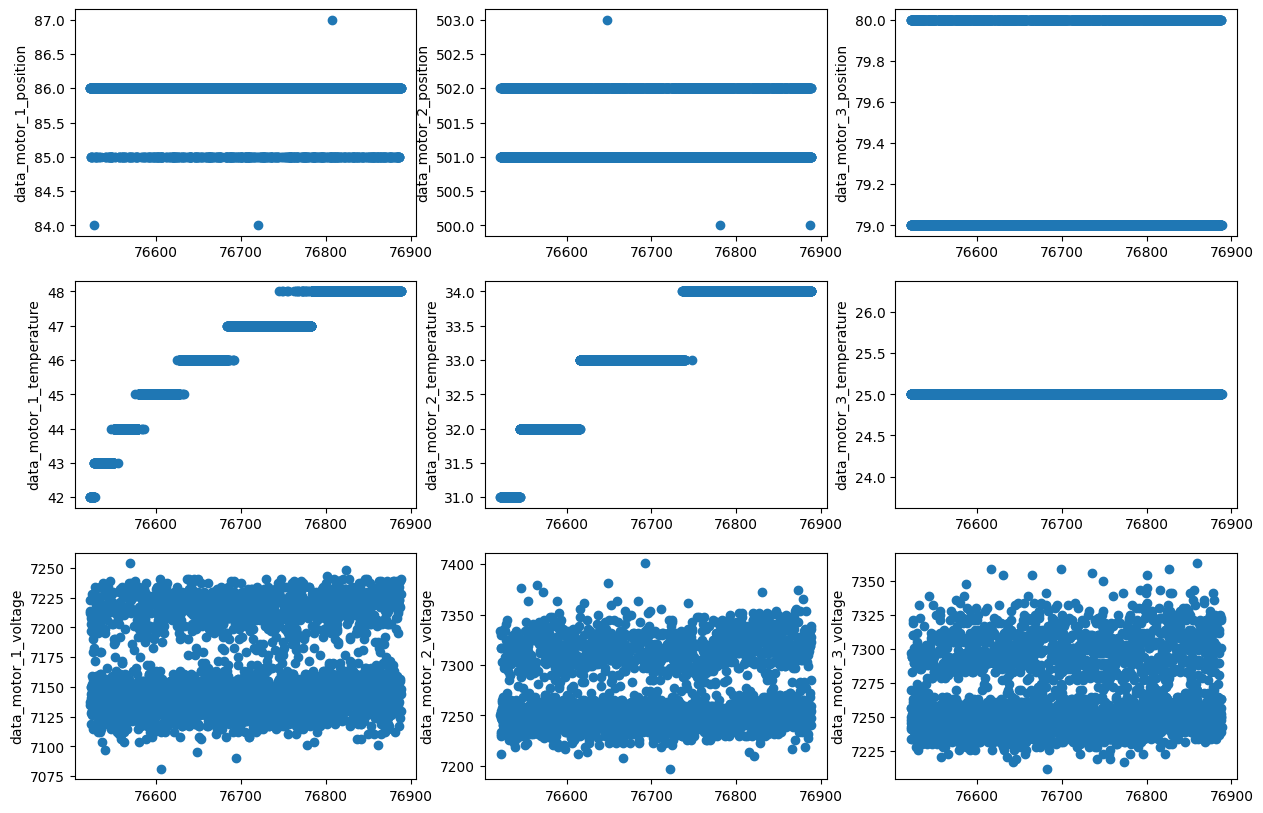

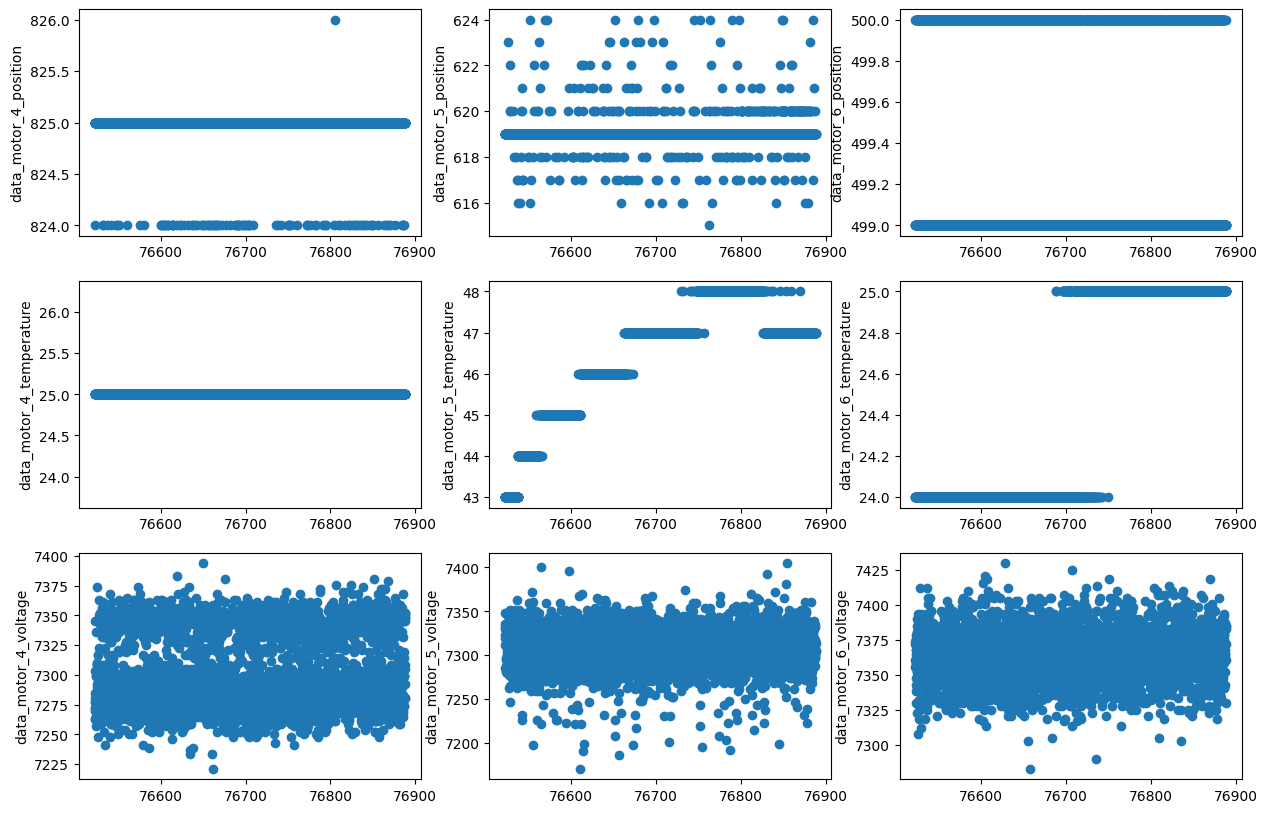

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



KeyboardInterrupt: 

In [3]:
import sys
sys.path.append('../../supporting_scripts/WP_1')  # Add the relative path to the sys.path
from utility import read_all_test_data_from_path


df = read_all_test_data_from_path('../../dataset/training_data/', is_plot=False)
df.info()

In [25]:
for i in df.columns:
    print(df[i].value_counts())

time
76522.025433    1
83298.904701    1
83301.704709    1
83301.604686    1
83301.504860    1
               ..
78820.830011    1
78820.729943    1
78820.629962    1
78820.529876    1
84966.826470    1
Name: count, Length: 31135, dtype: int64
data_motor_1_position
68     7743
86     5327
58     3100
433    3026
438    1243
       ... 
199       1
271       1
56        1
77        1
306       1
Name: count, Length: 177, dtype: int64
data_motor_1_temperature
45     5386
44     2176
29     2118
54     2042
47     1966
55     1926
48     1856
30     1776
28     1305
57     1165
46      936
43      819
56      794
31      786
33      688
32      672
34      580
42      515
39      490
40      435
41      432
35      391
36      309
37      306
38      268
49      194
50      193
51      156
53      147
27      132
52      127
58       45
255       1
249       1
251       1
254       1
Name: count, dtype: int64
data_motor_1_voltage
 7048    319
 7044    316
 7046    302
 7050    301
 7041  

For each motors, there are 4 columns : 
- the *position*
- the *temperature* 
- the *voltage*
- the *label* (which is 0 if there is no abnormaly).  
   
And a column named *test_condition* gives the condition of the measurement.

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

- Do we have a lot noise in the features? Do we need to smooth the data?


- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference i

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



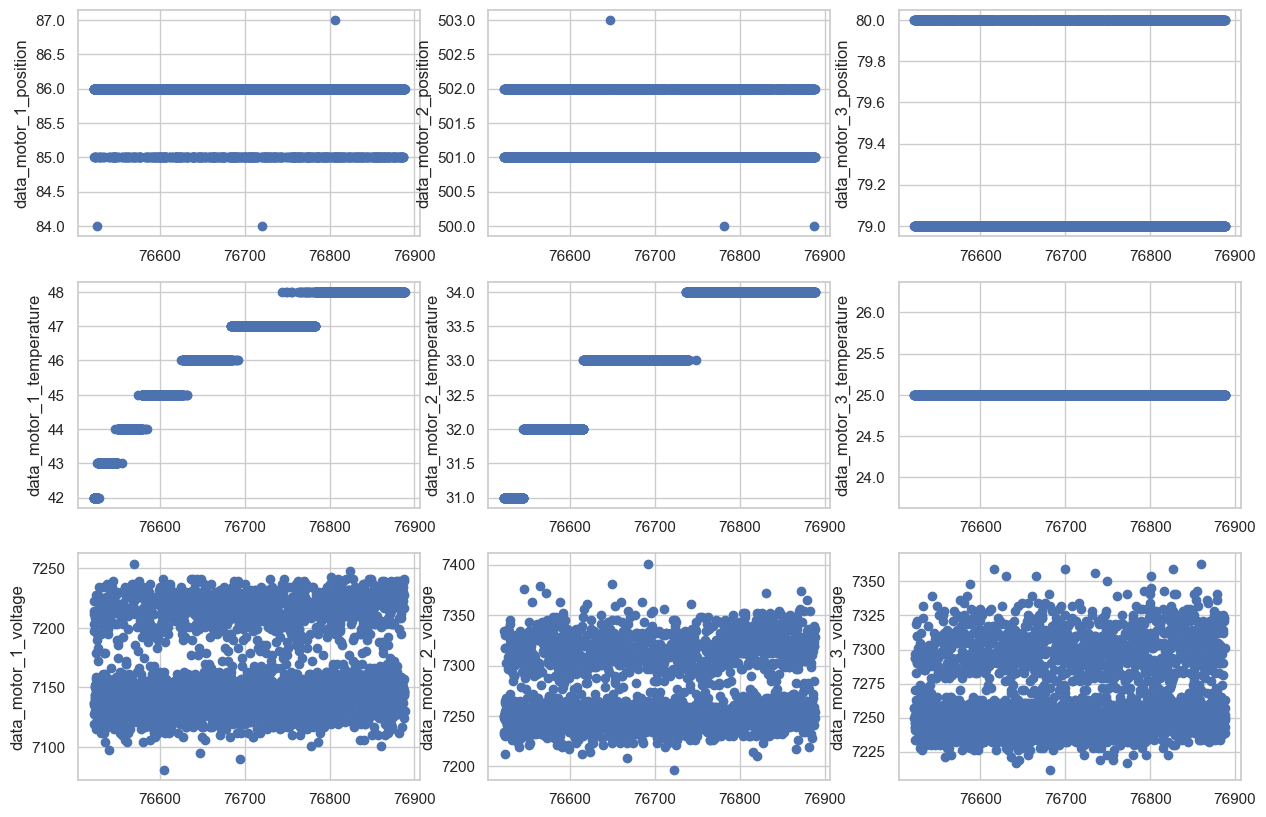

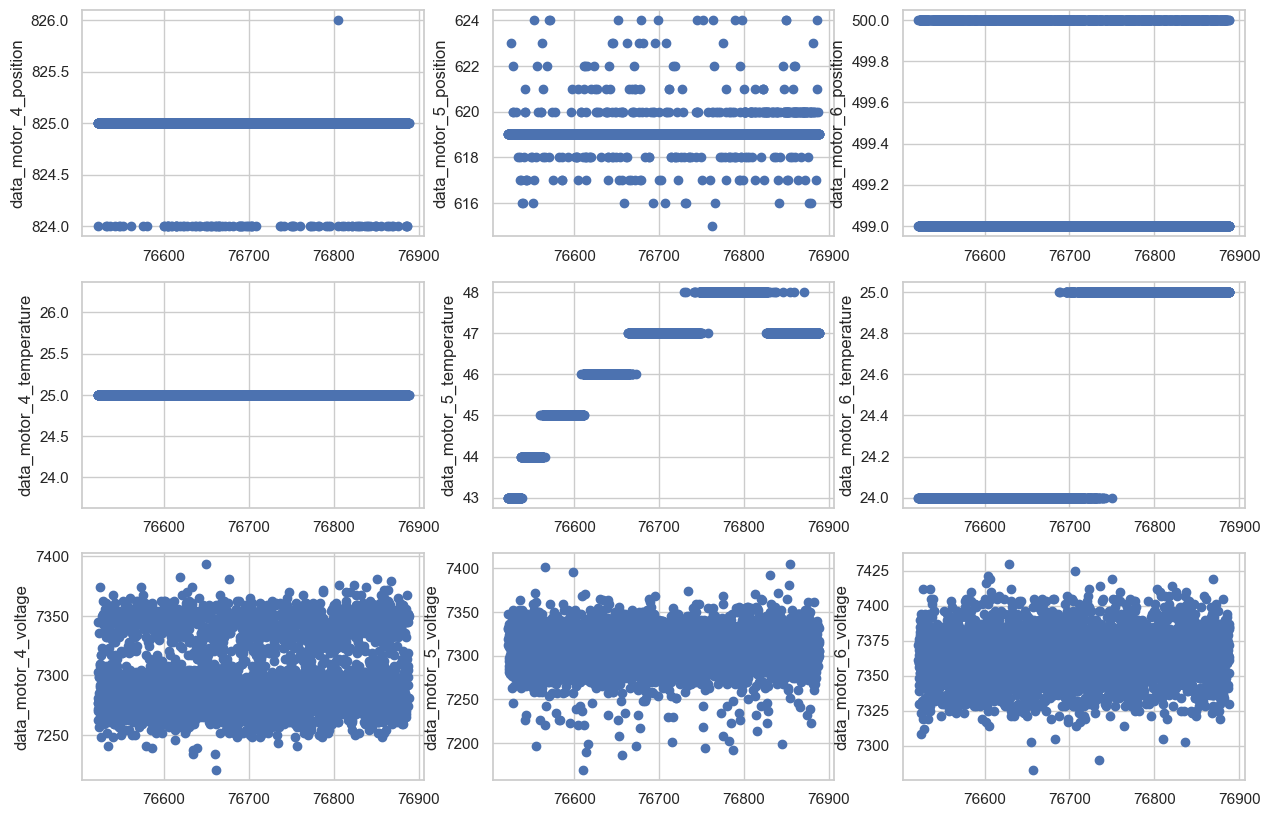

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



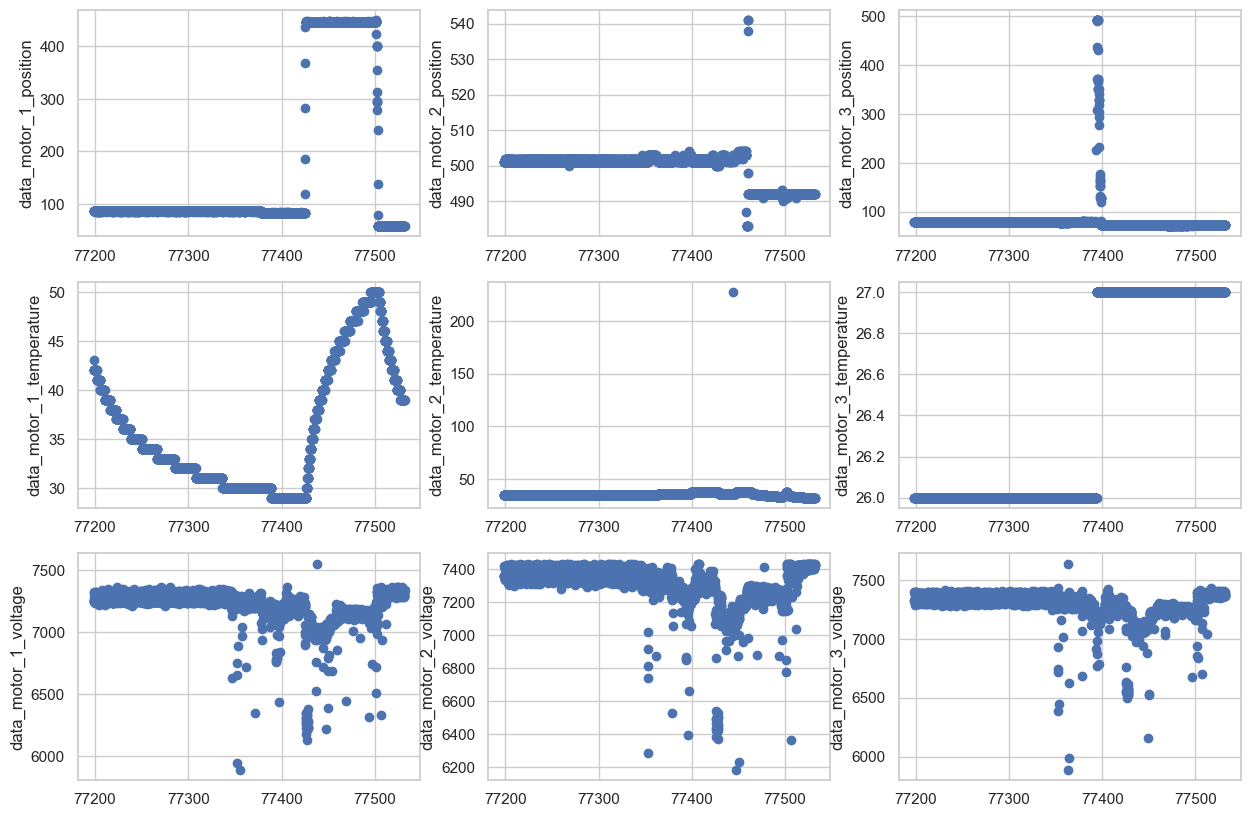

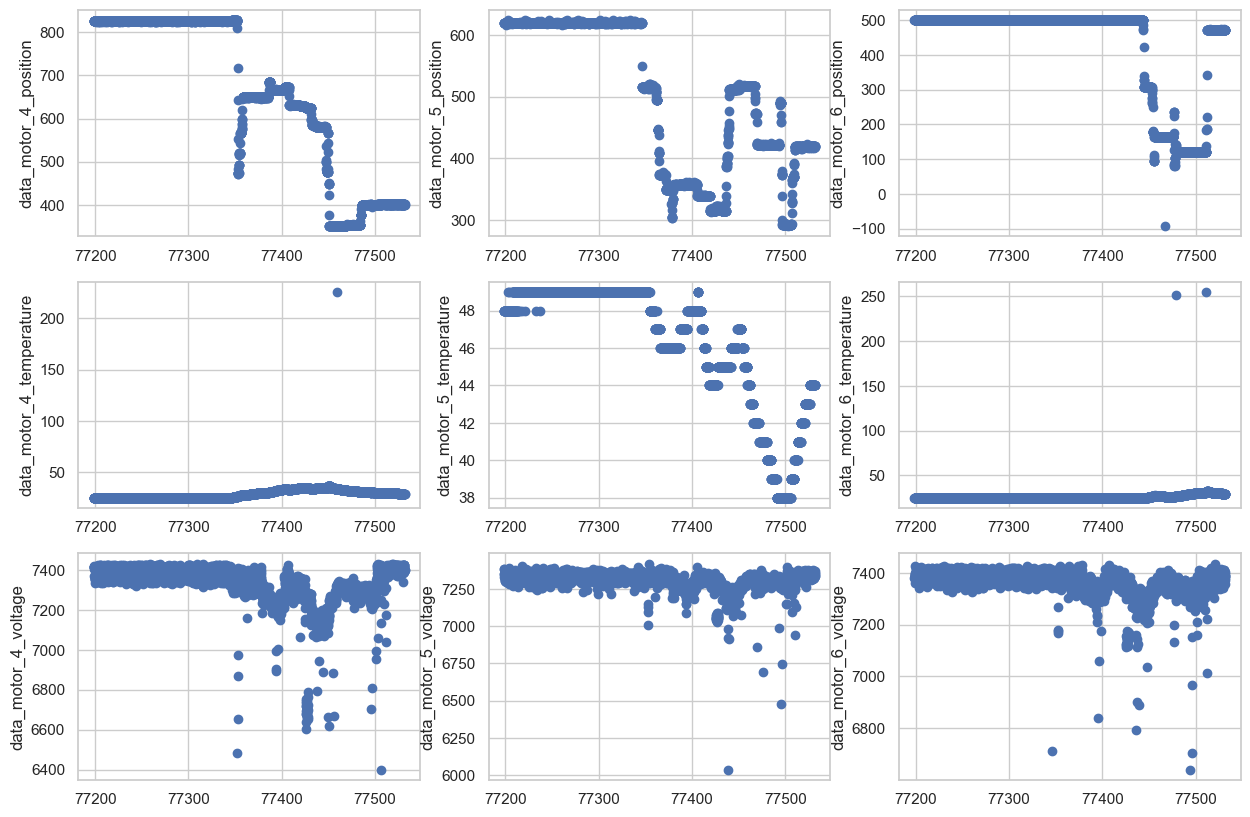

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



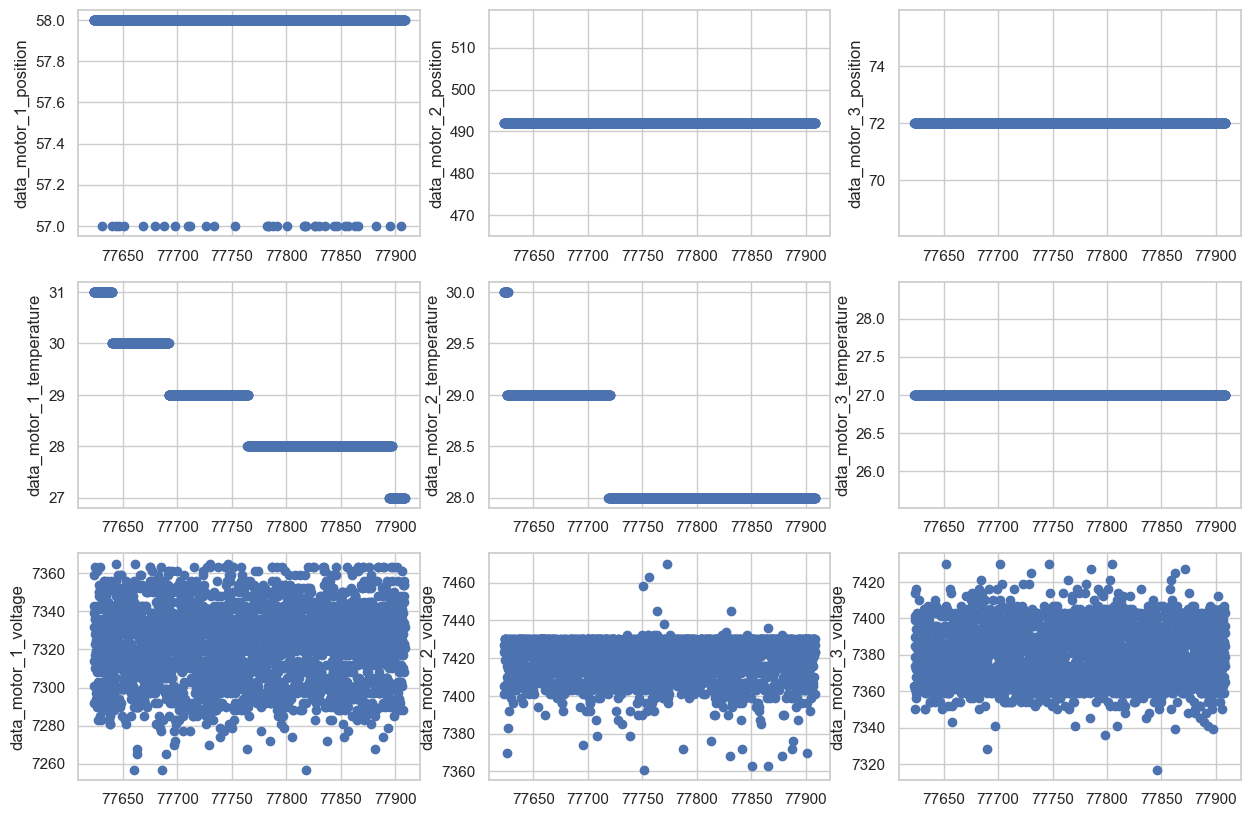

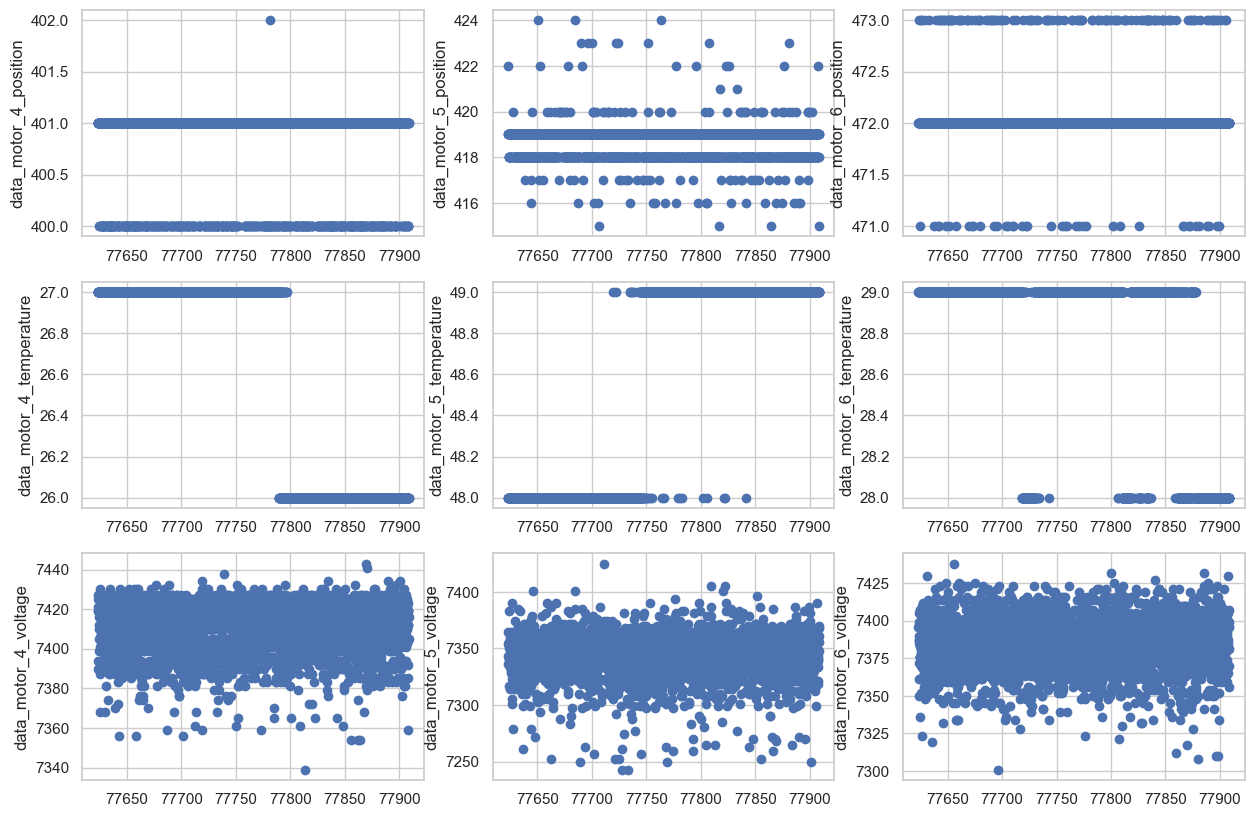

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



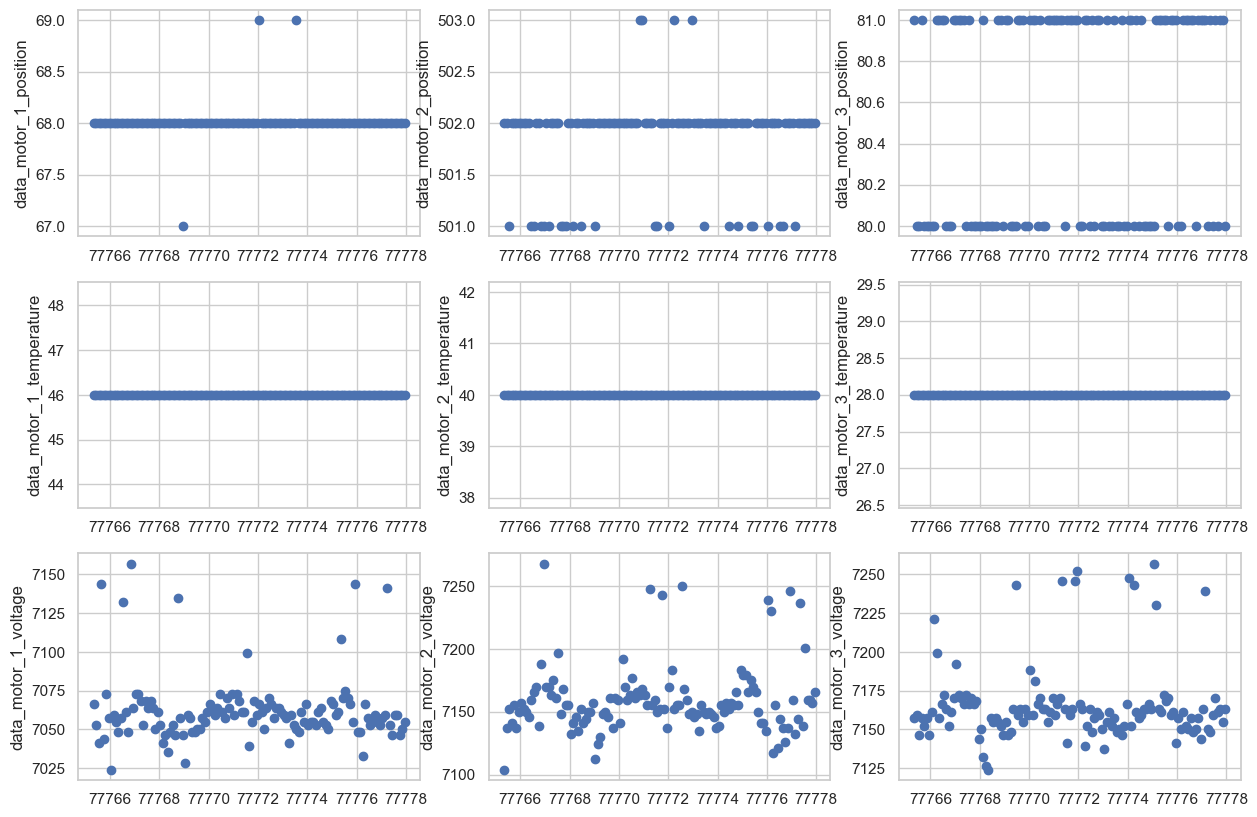

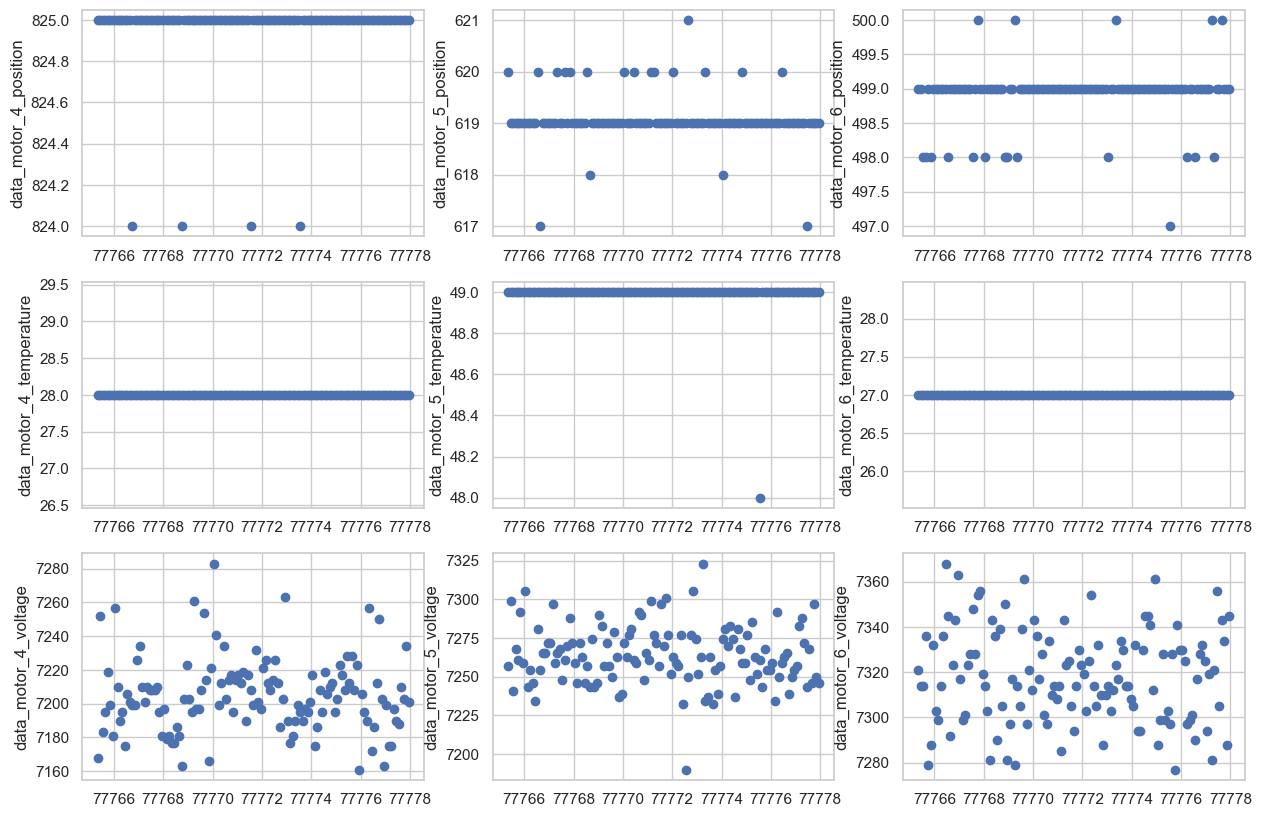

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



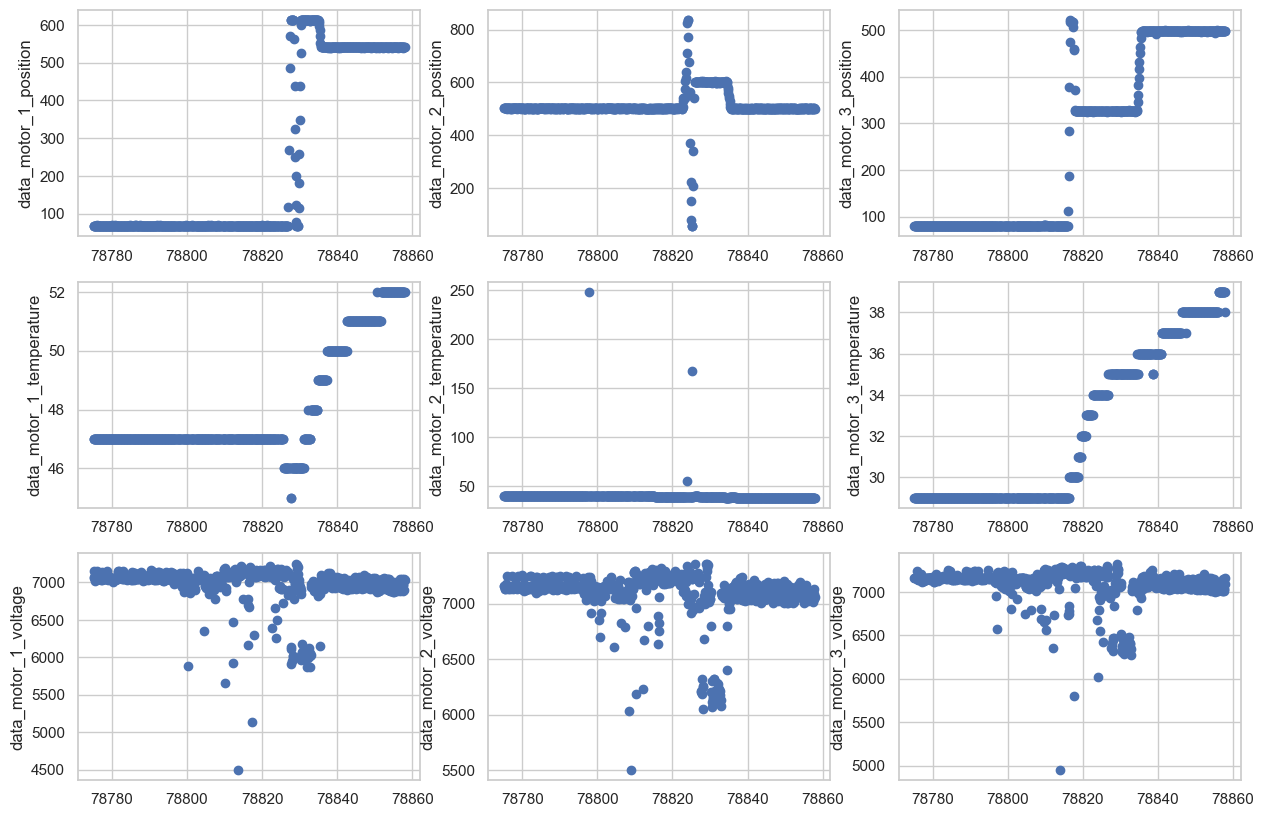

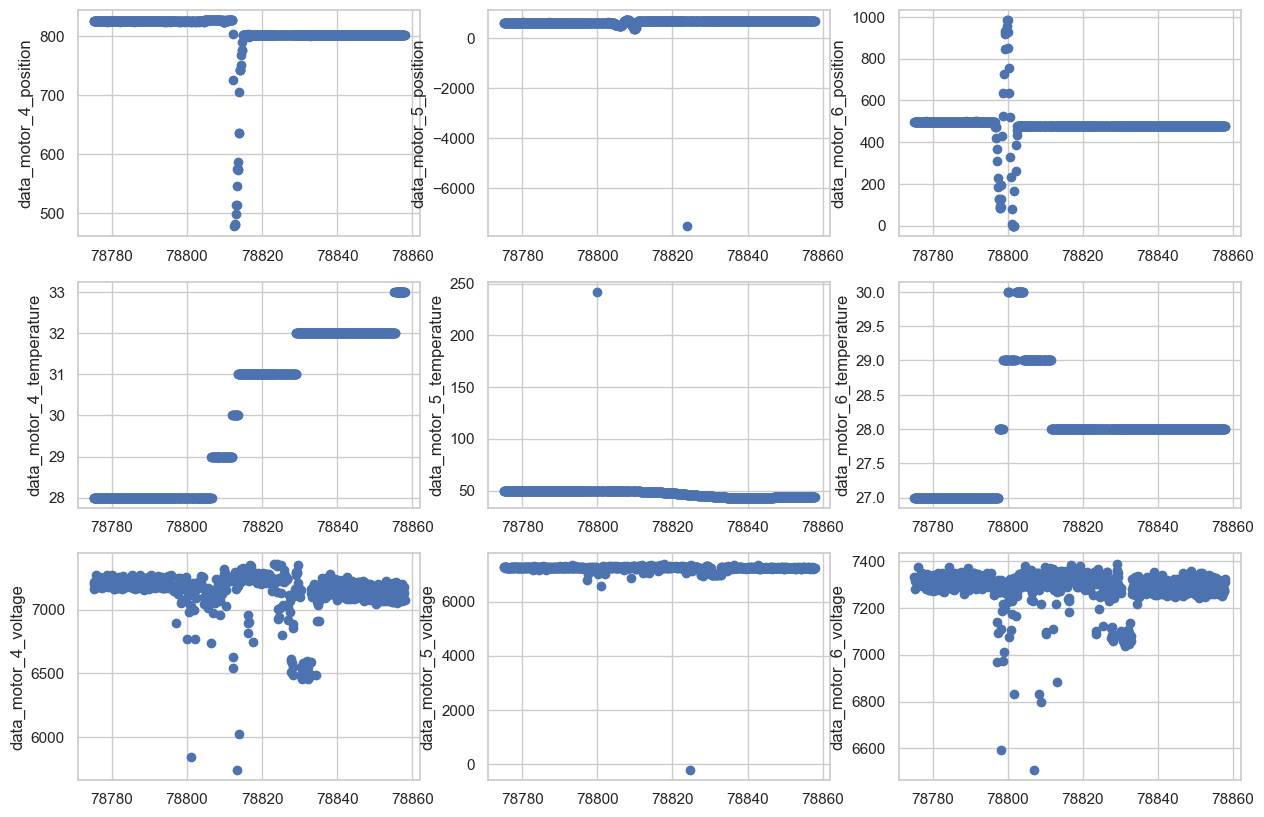

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



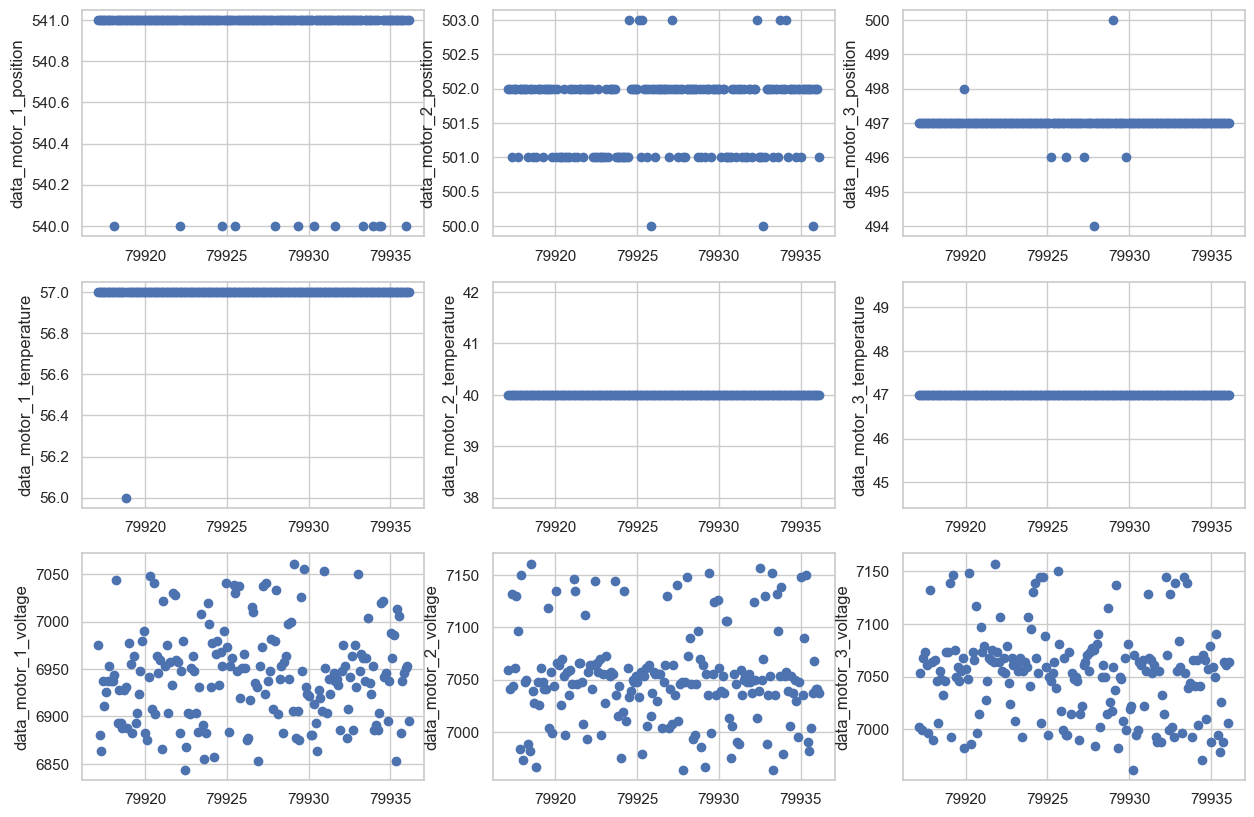

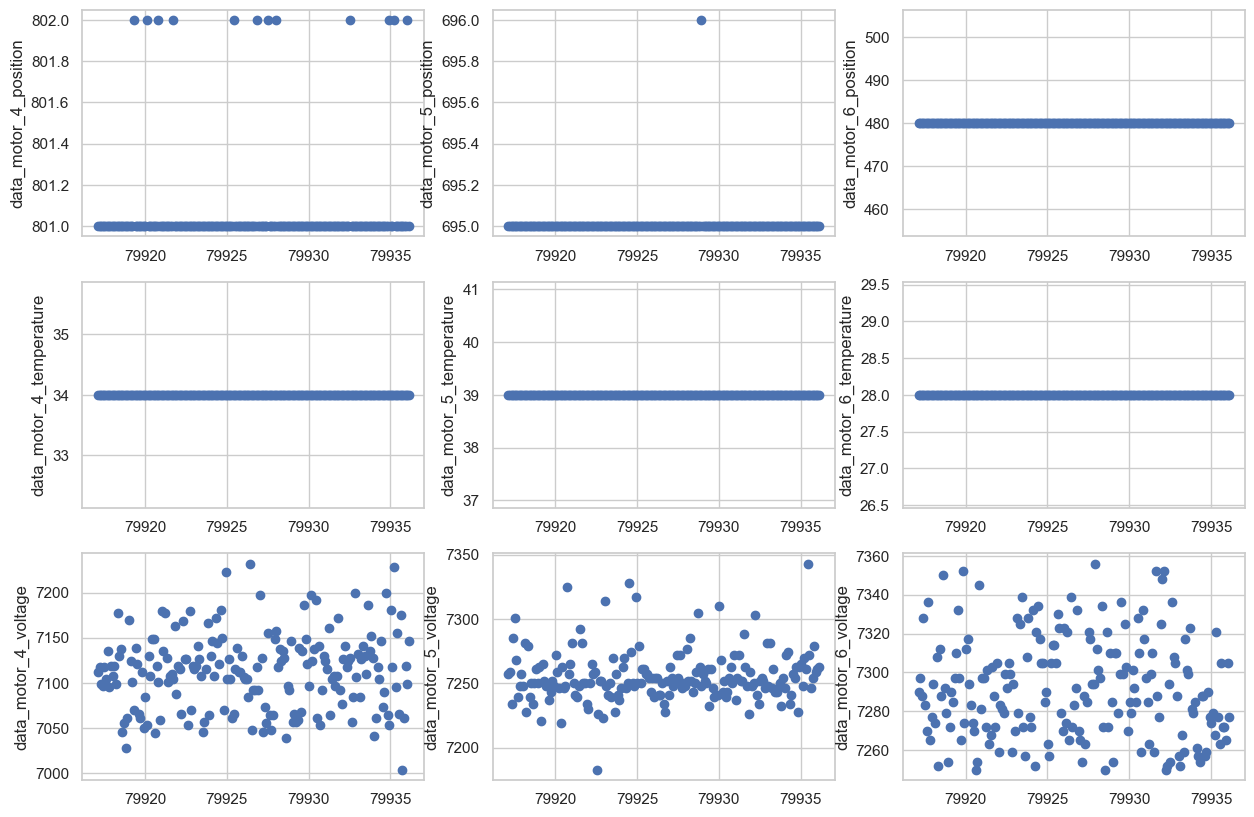

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



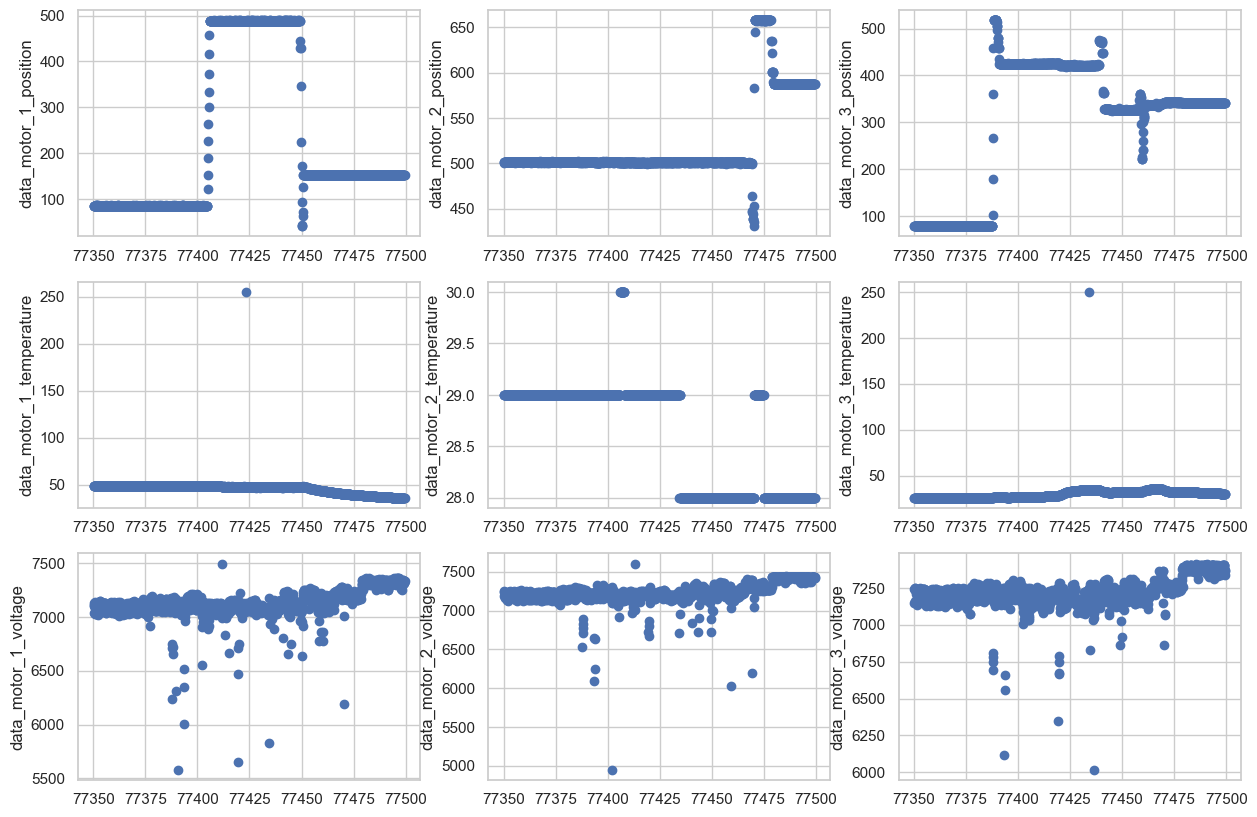

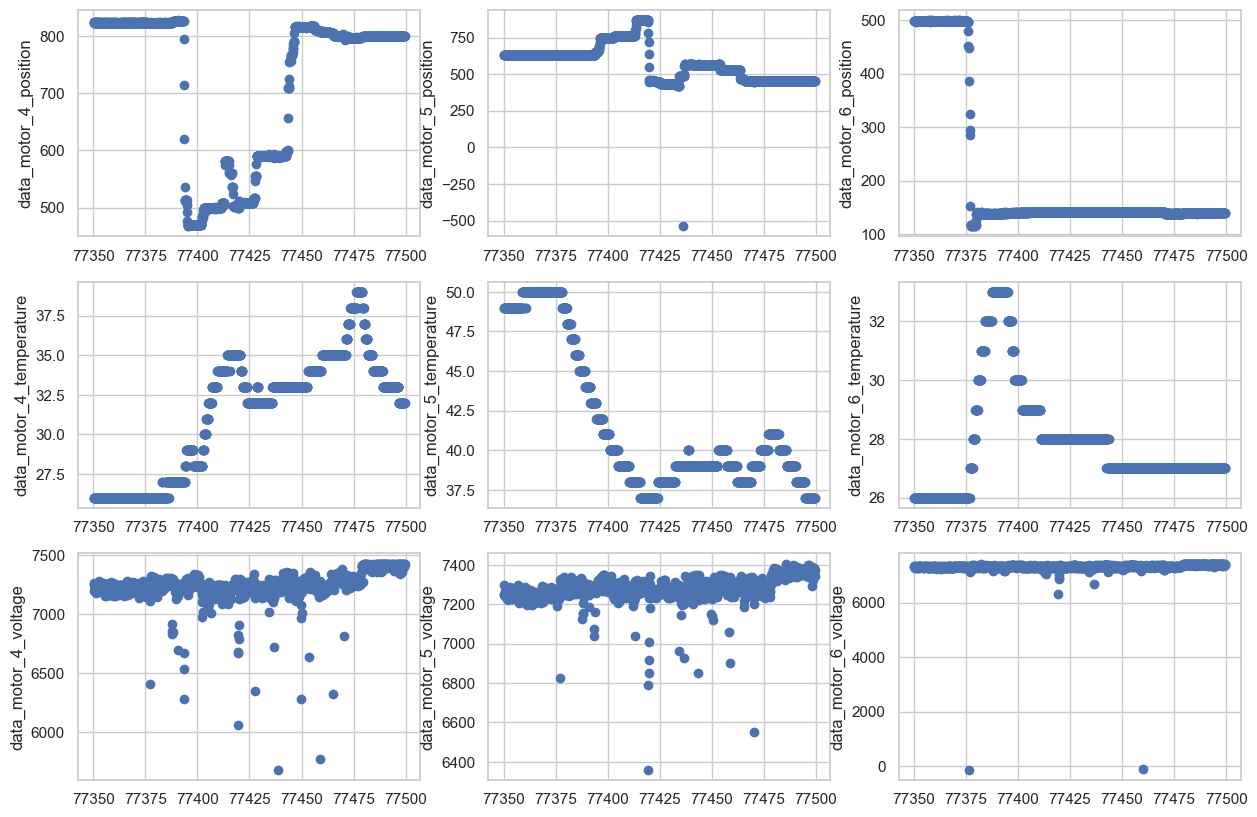

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



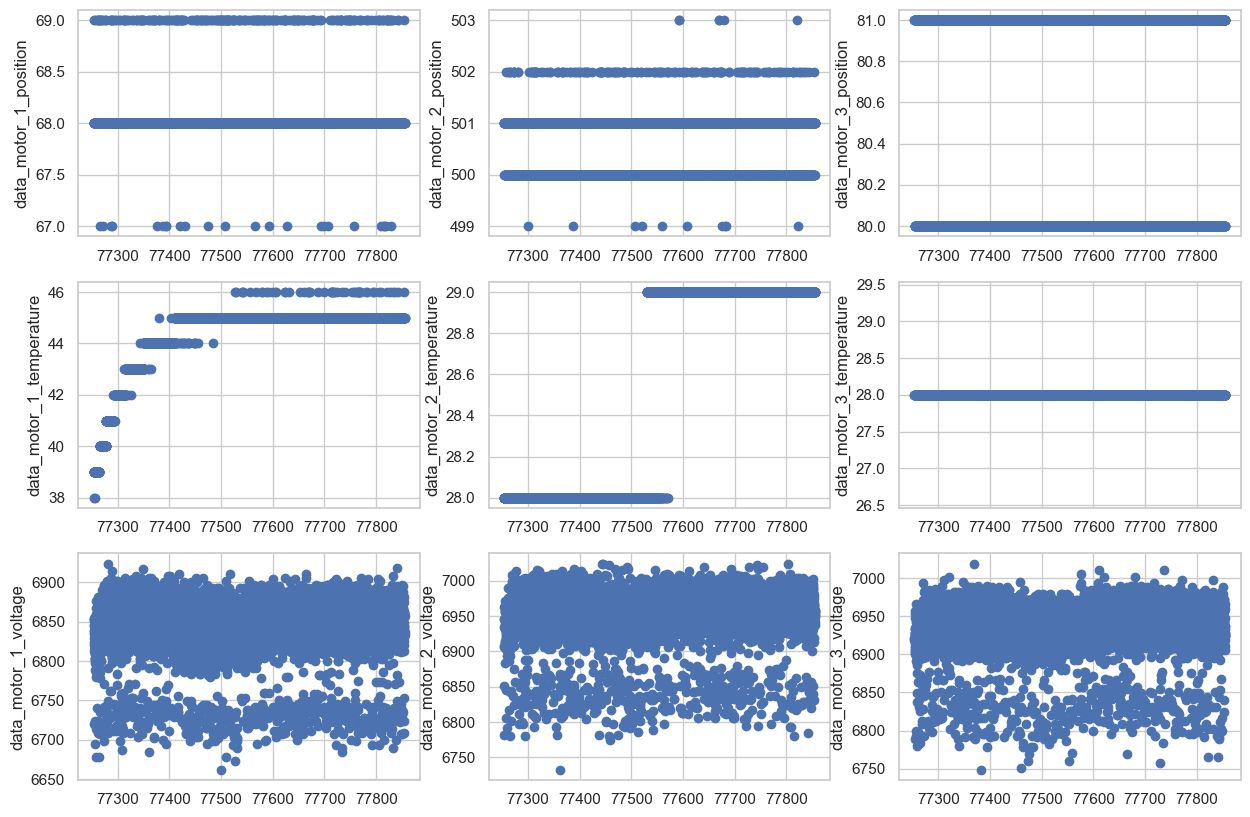

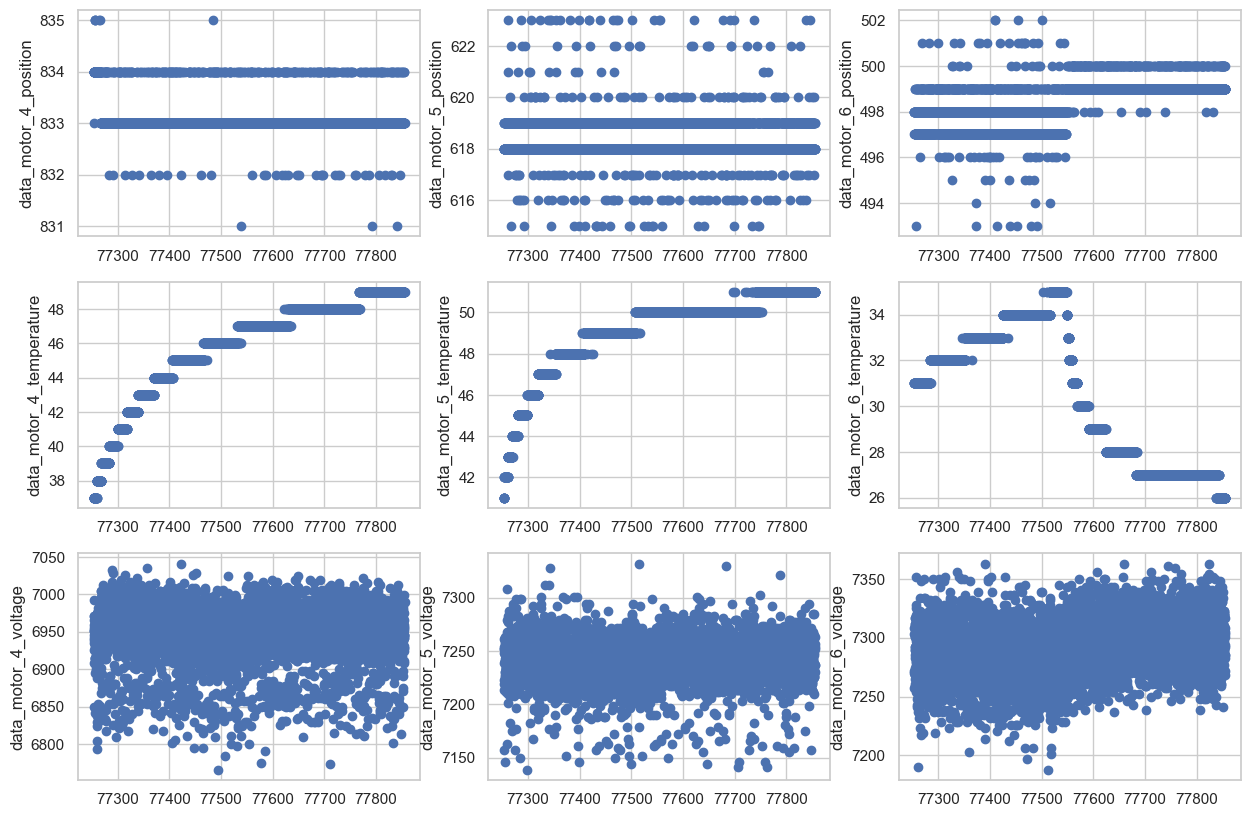

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



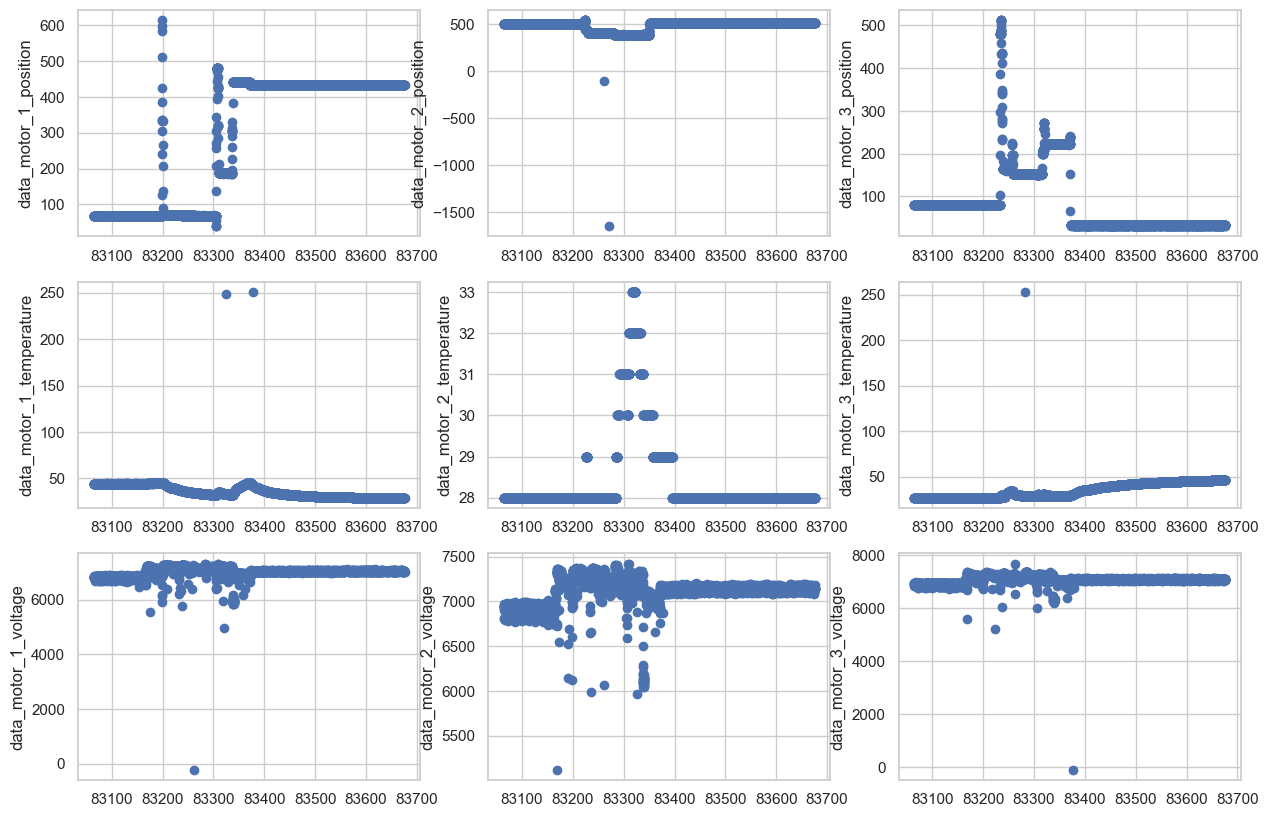

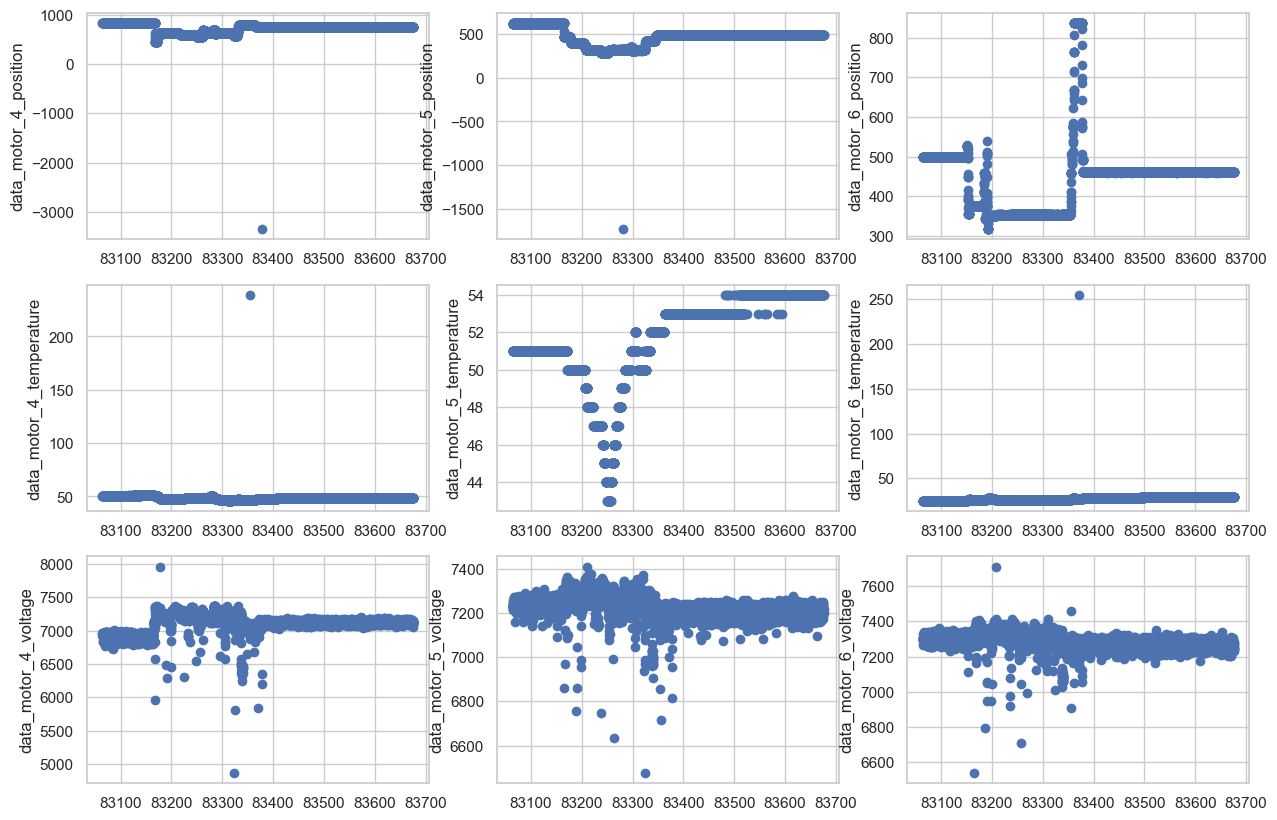

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



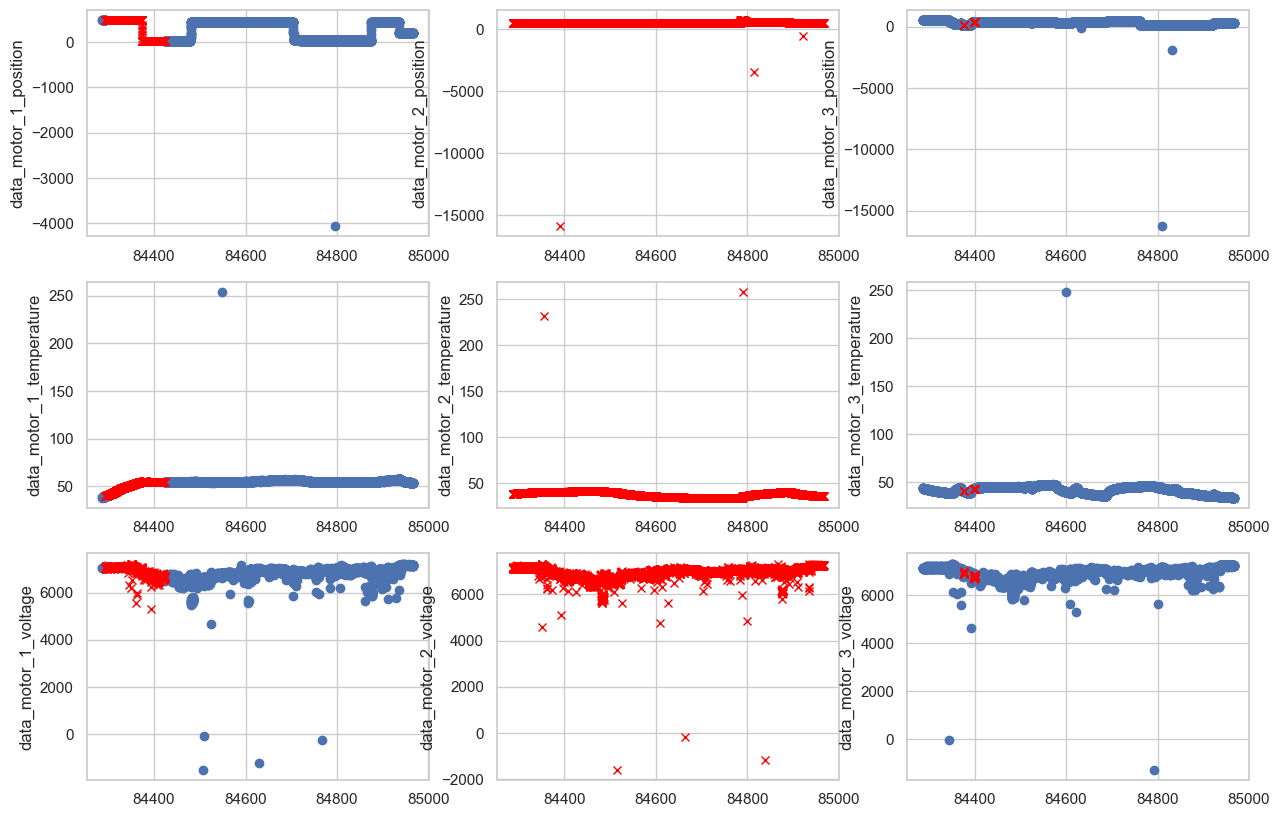

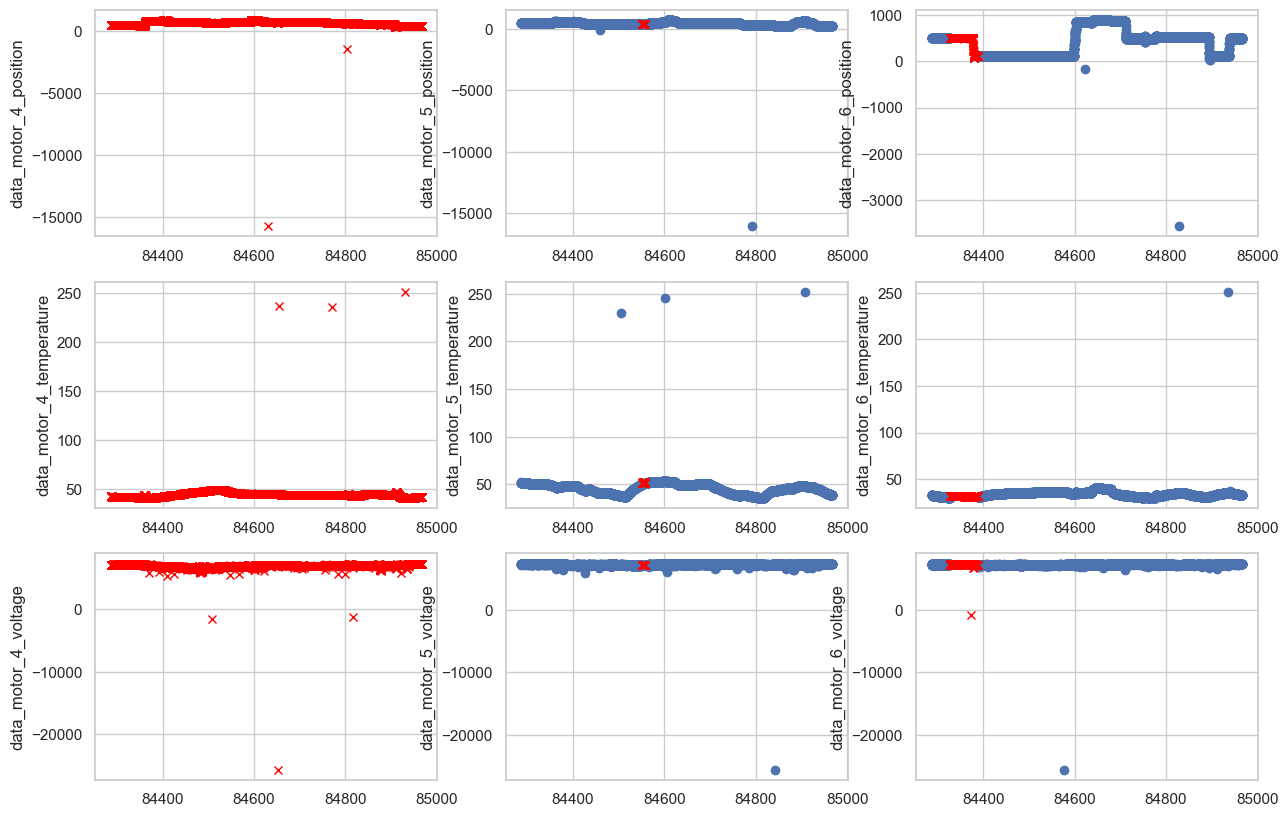

In [26]:
#Visualization : 
df = read_all_test_data_from_path('../dataset/training_data/', is_plot=True)


## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

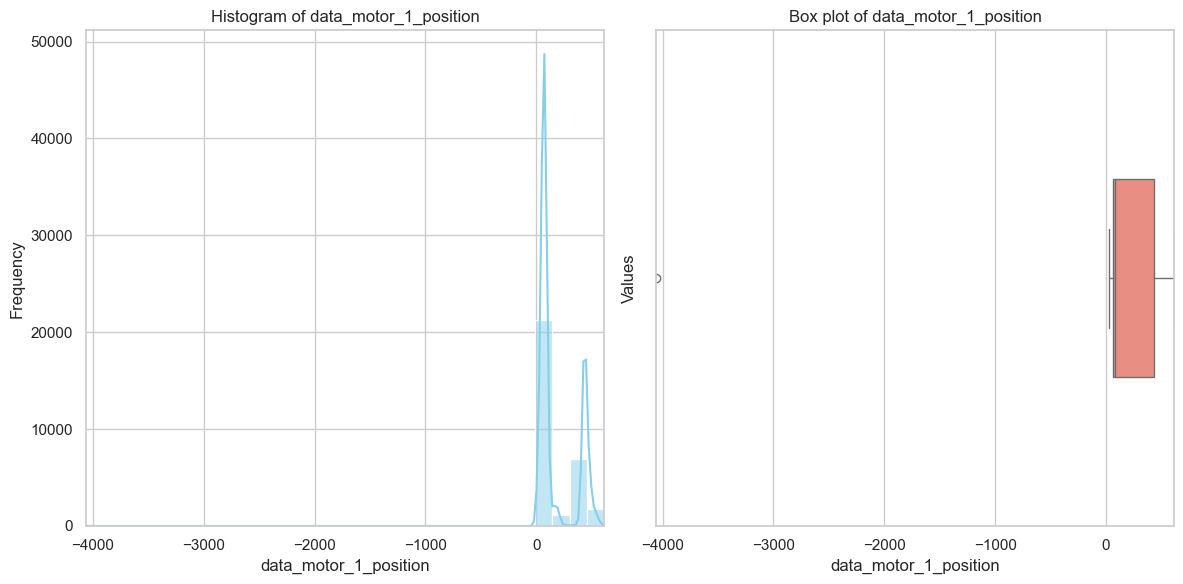

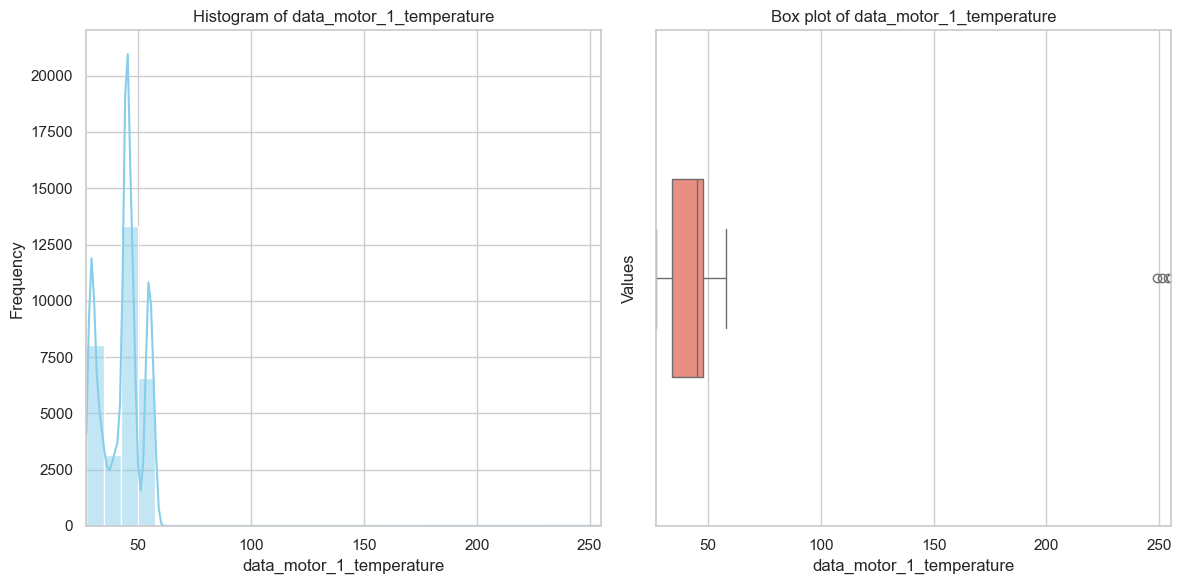

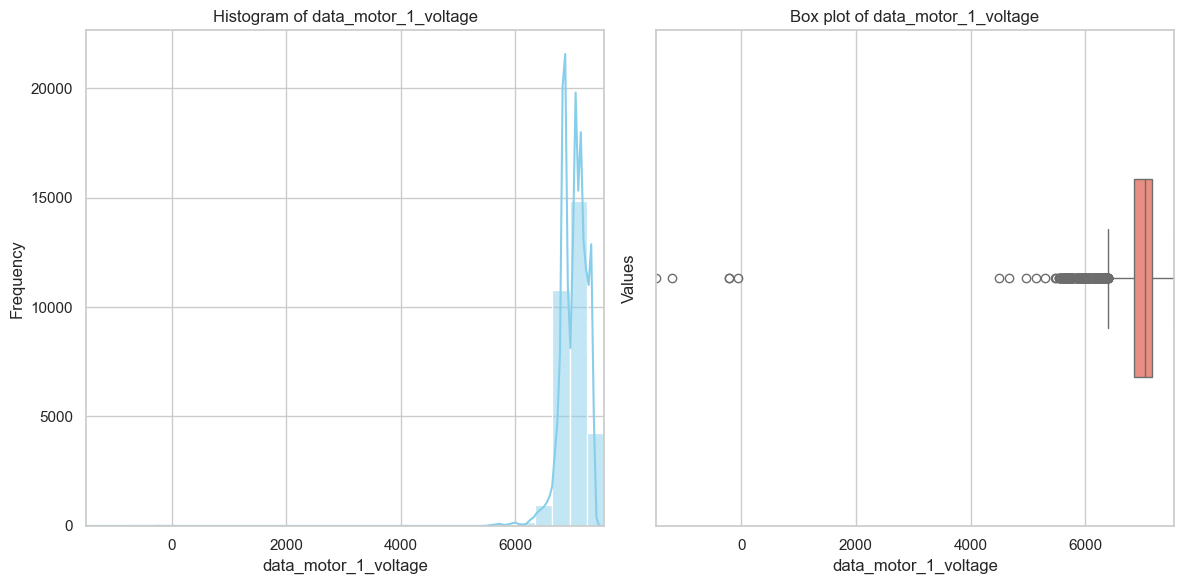

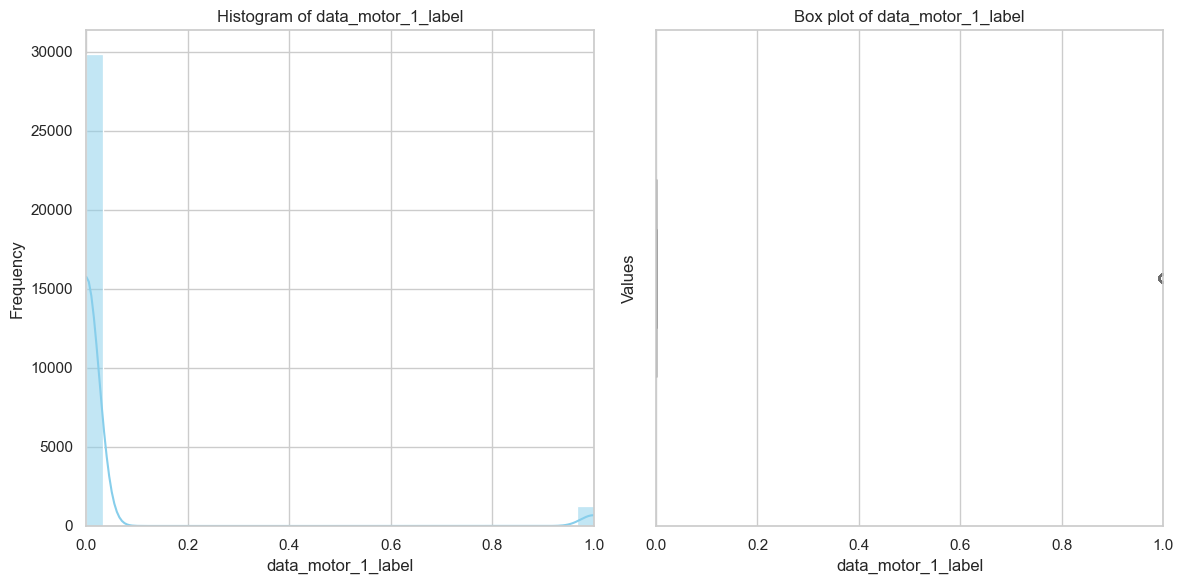

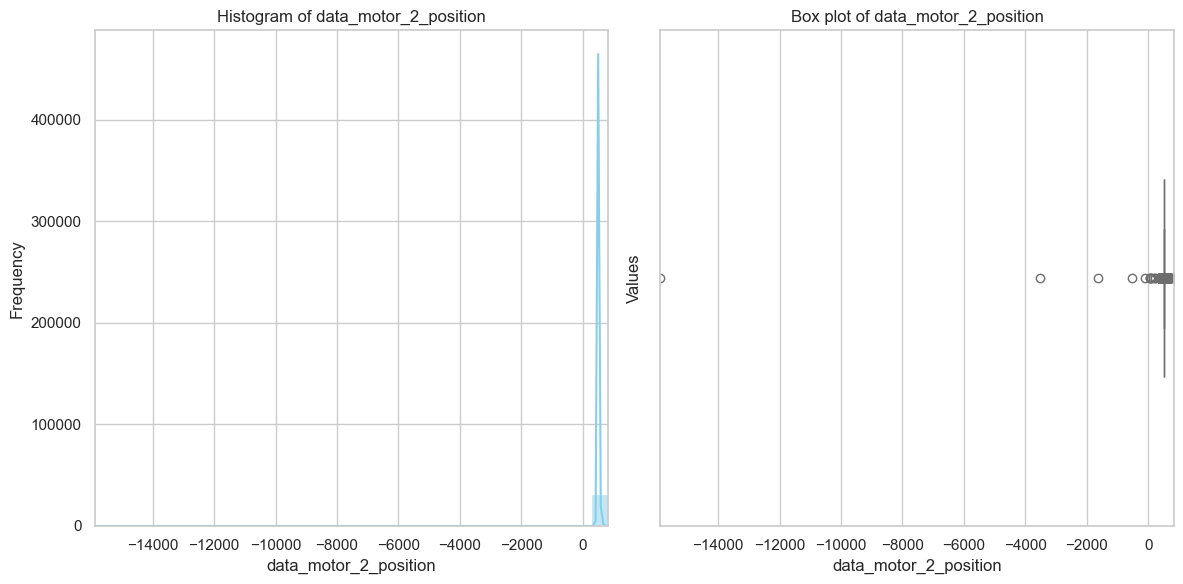

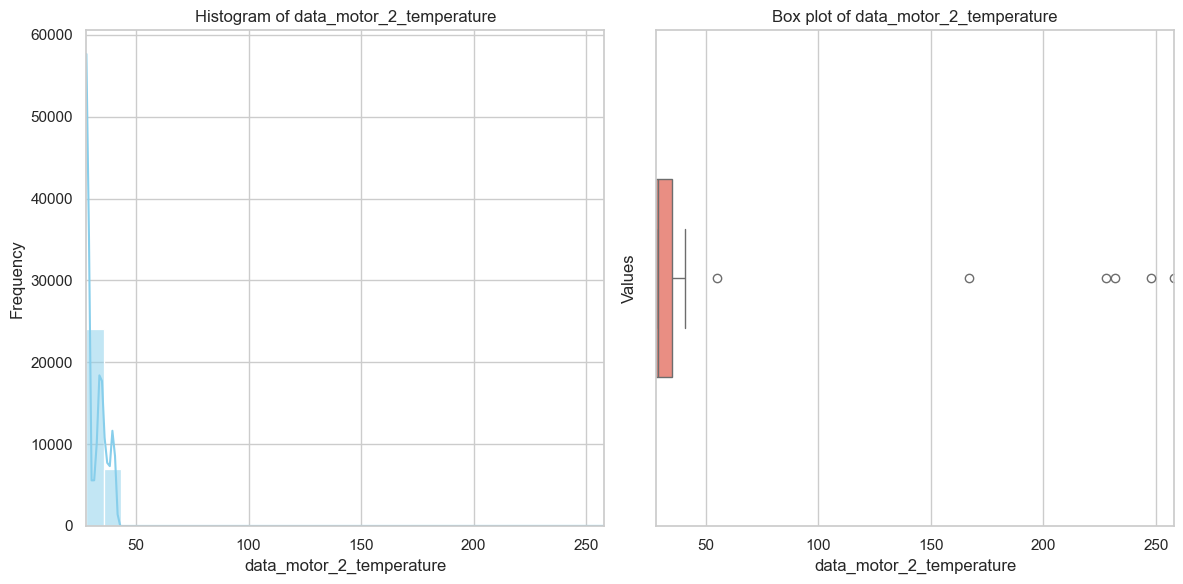

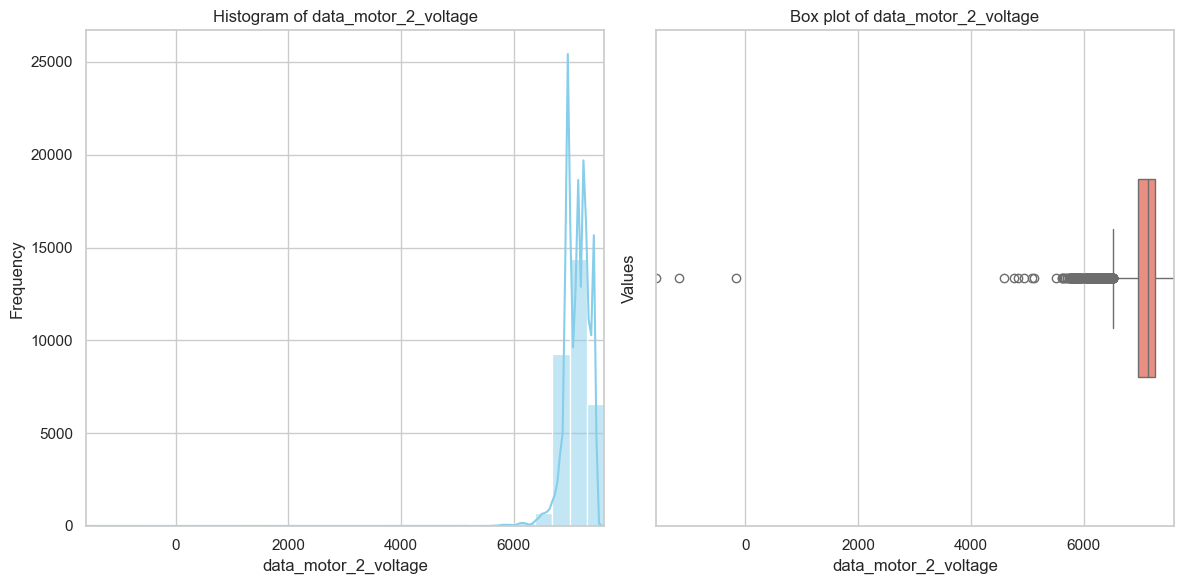

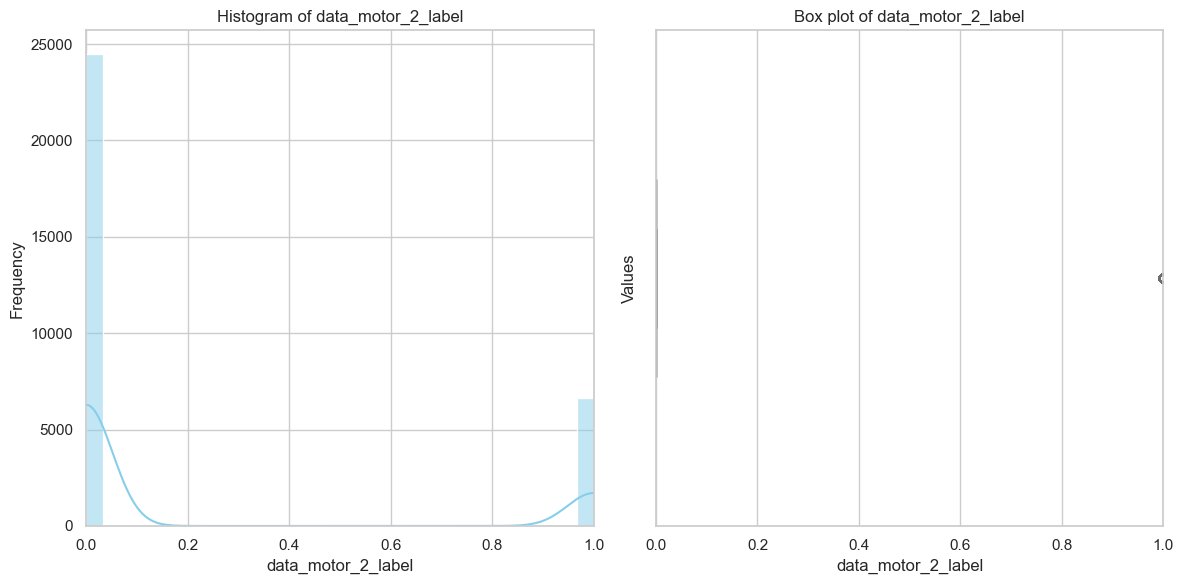

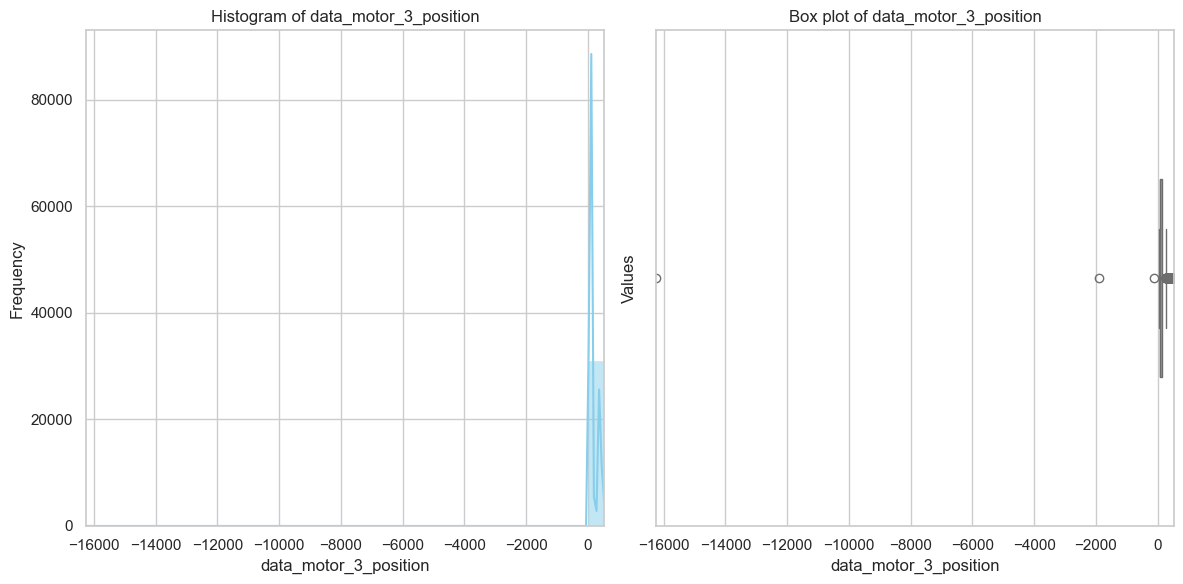

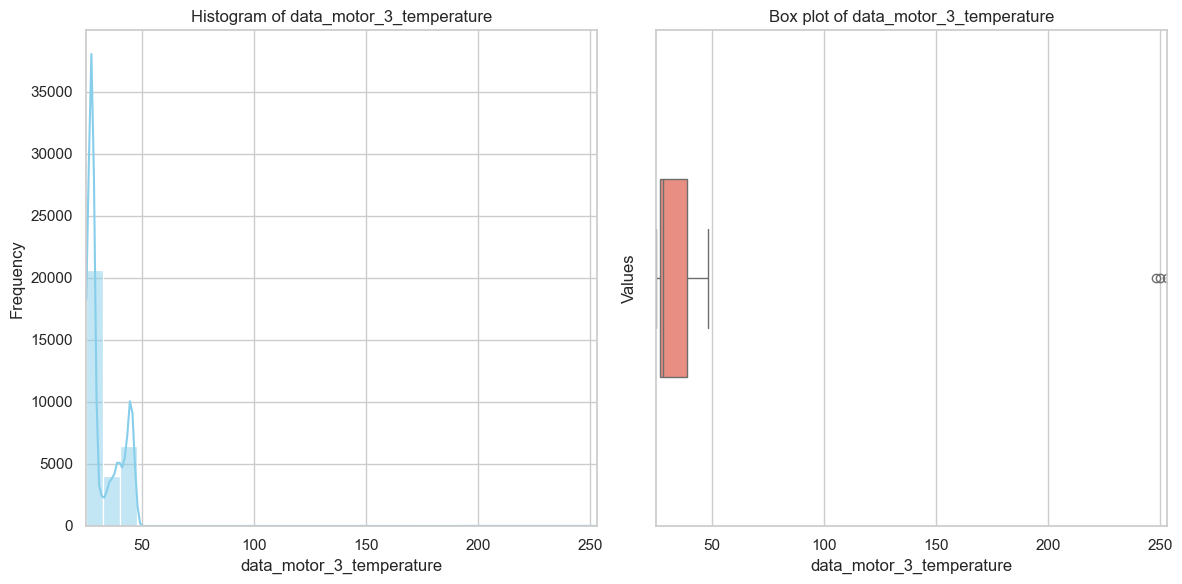

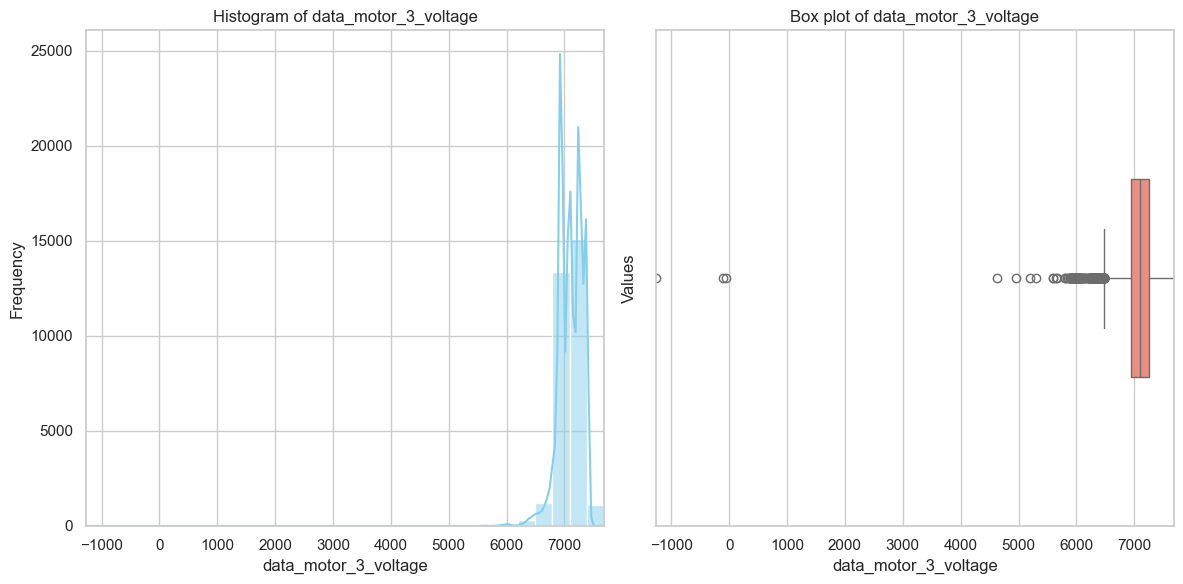

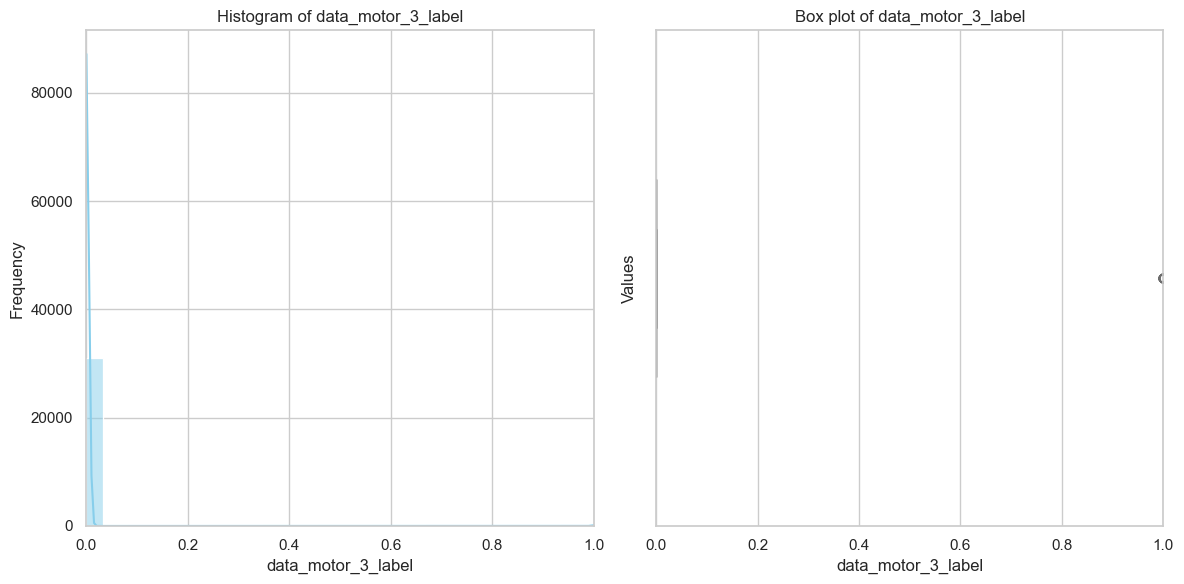

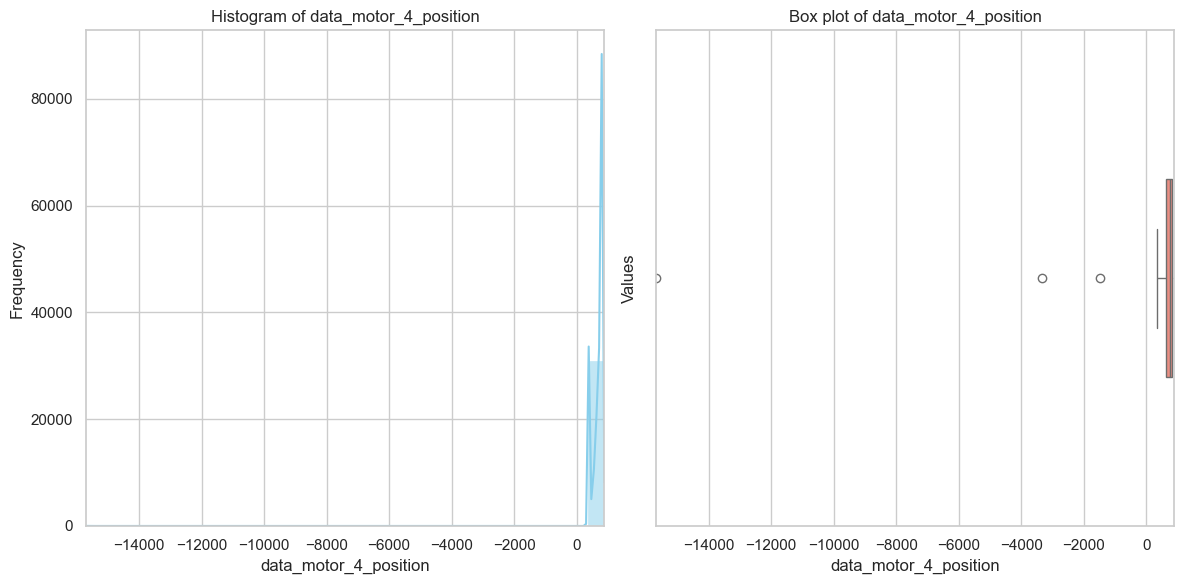

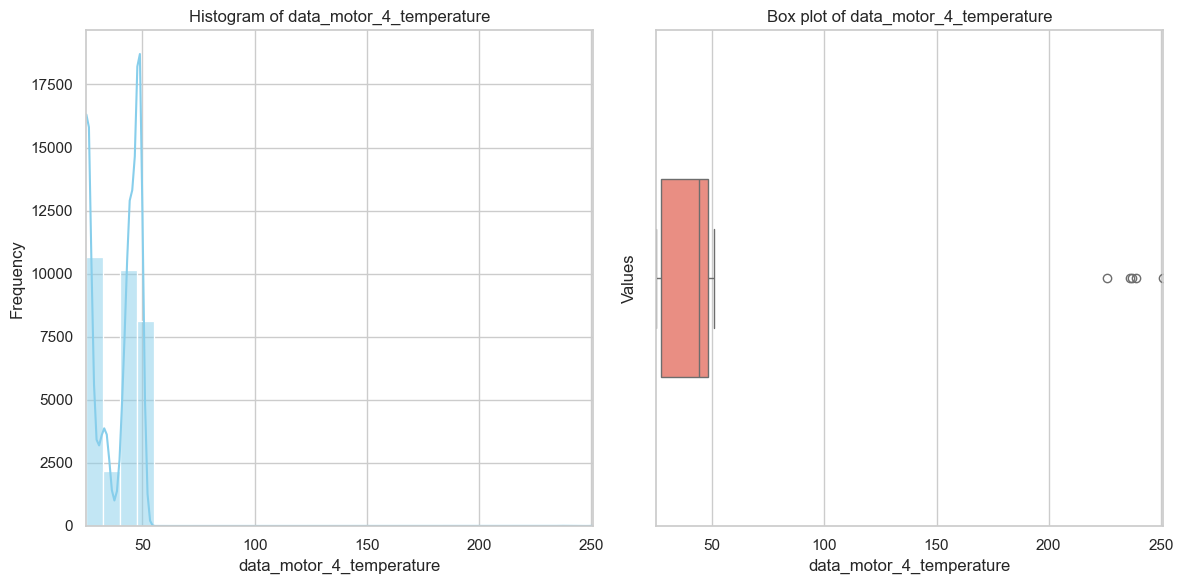

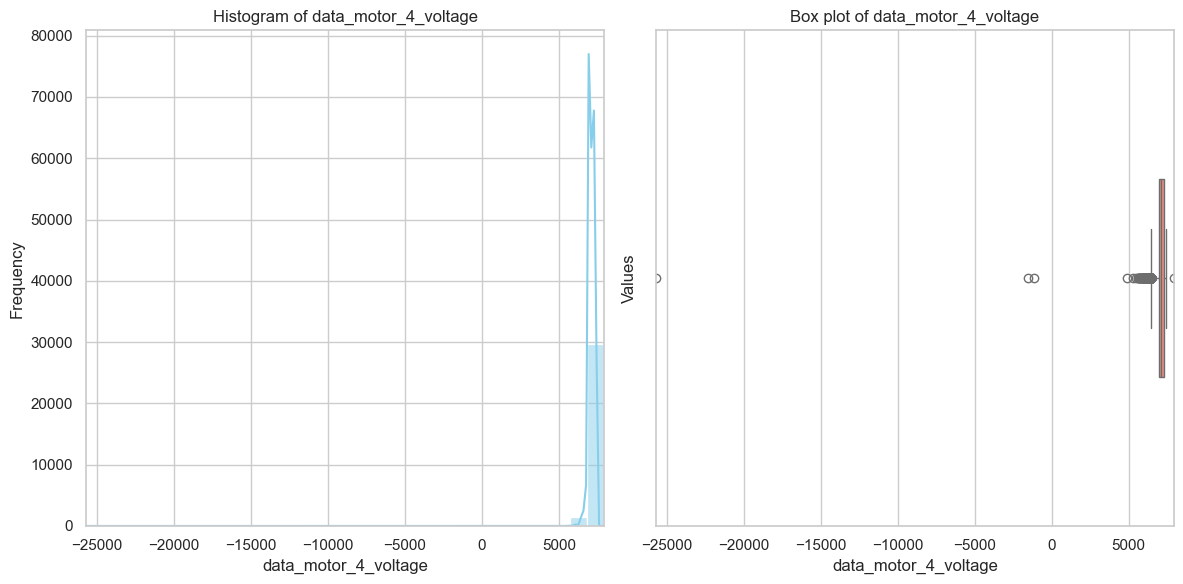

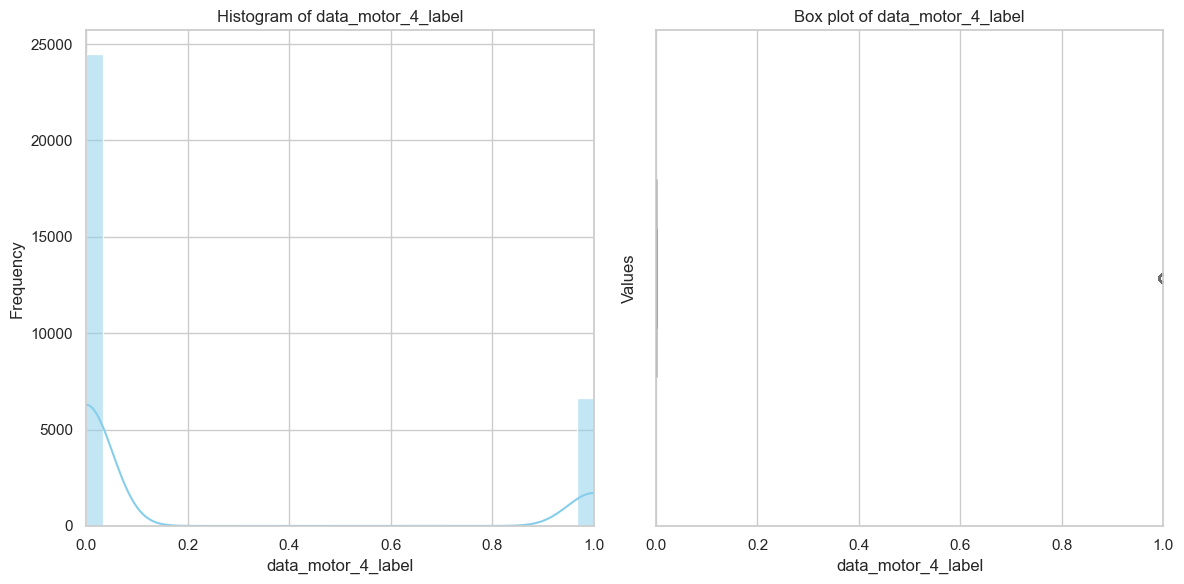

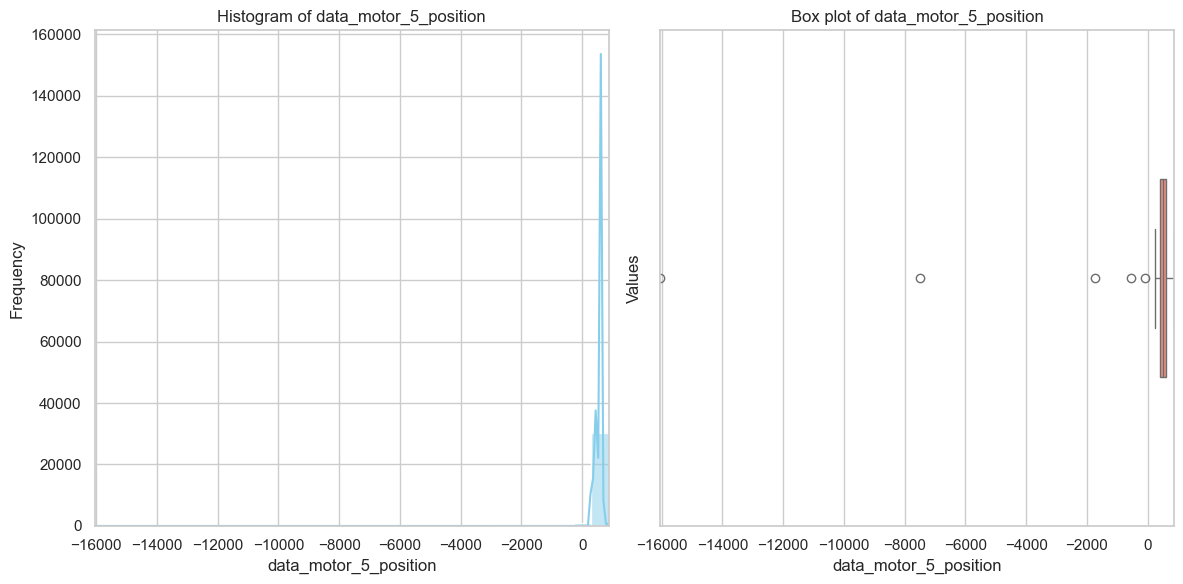

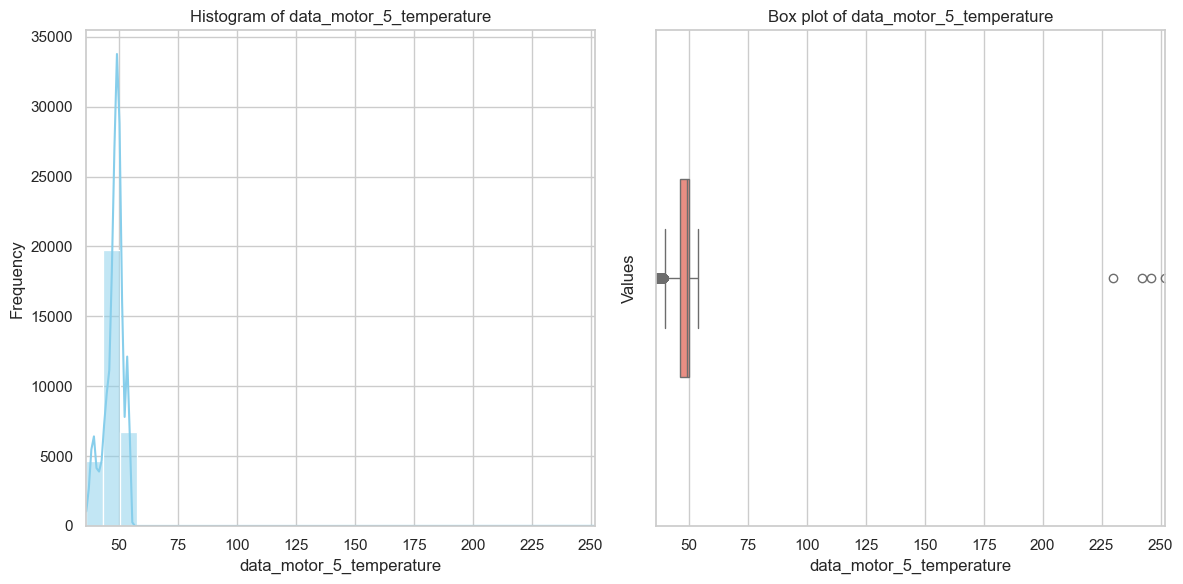

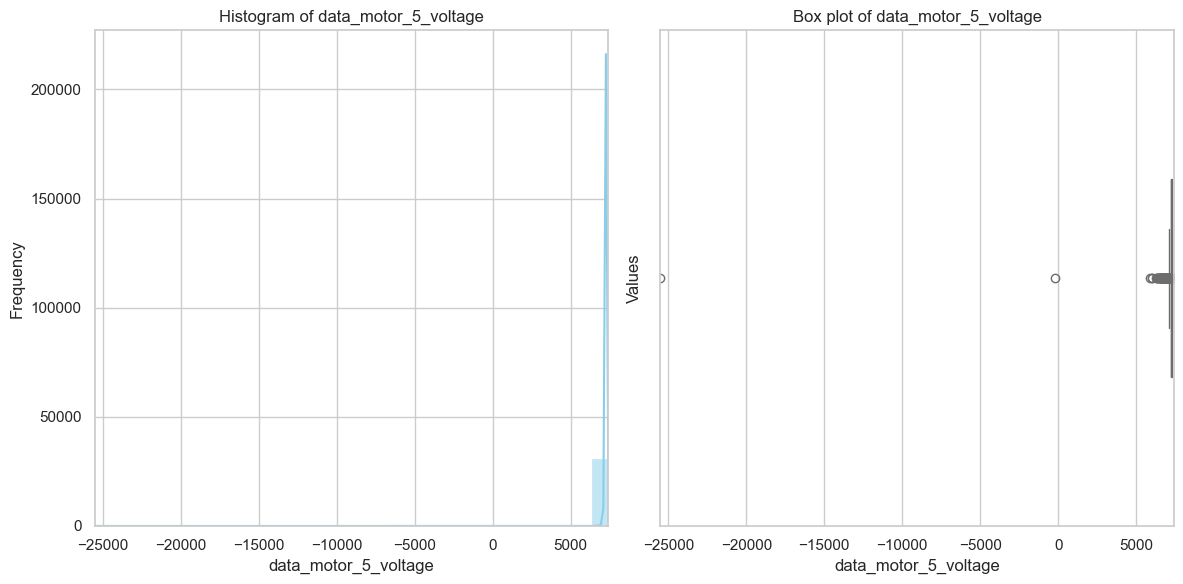

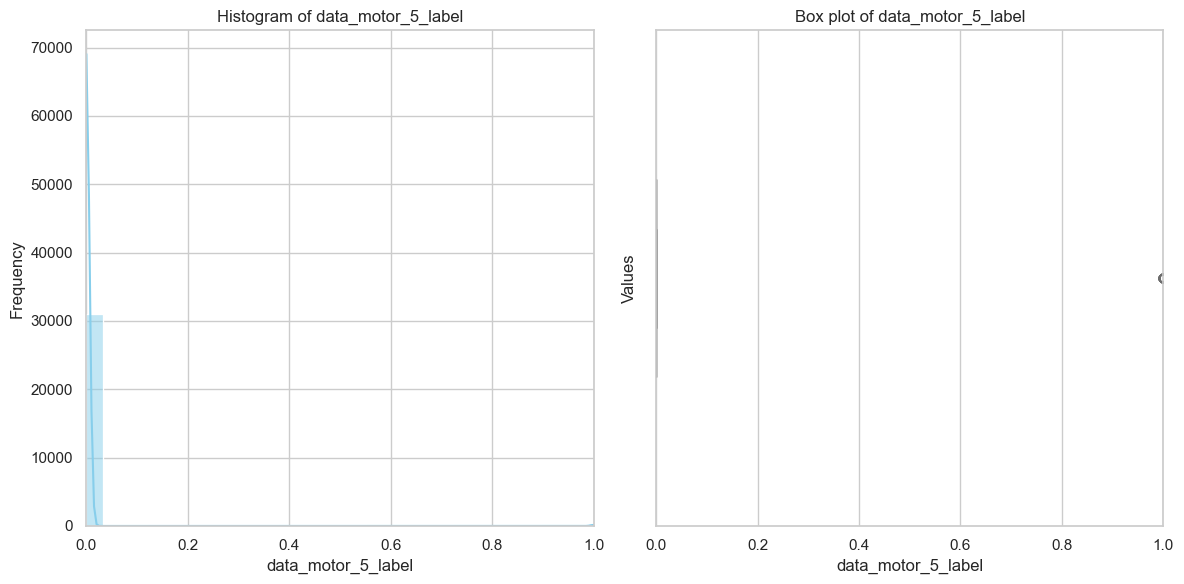

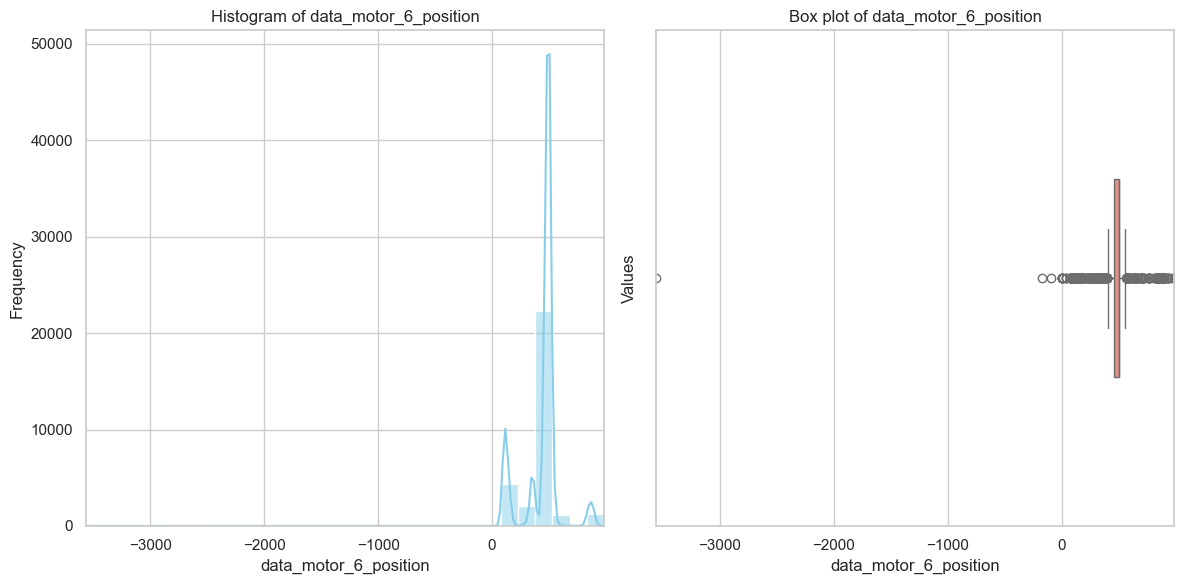

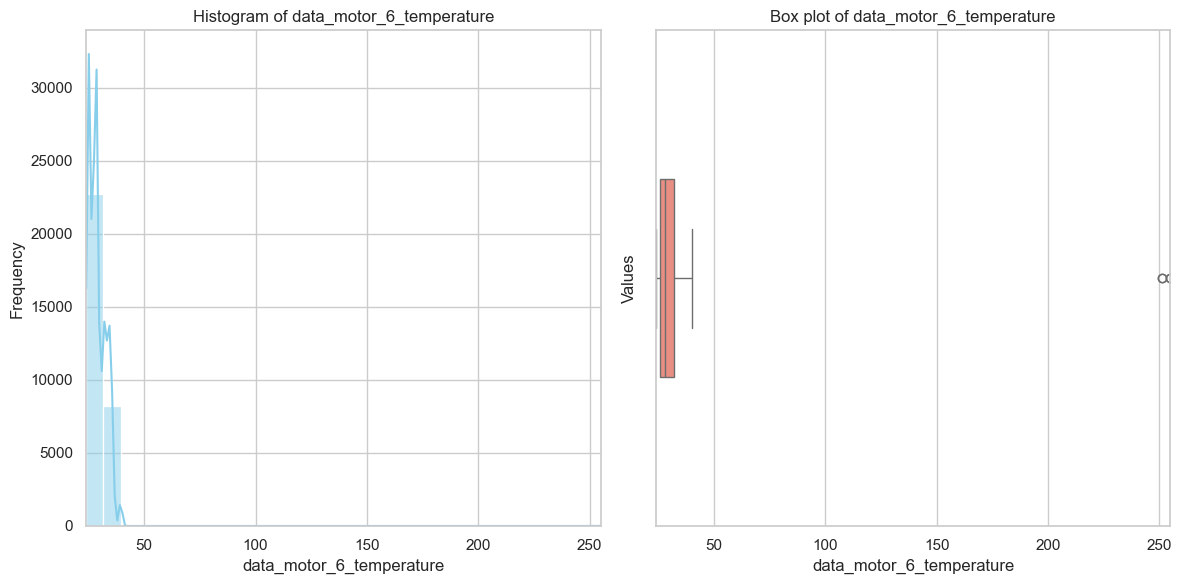

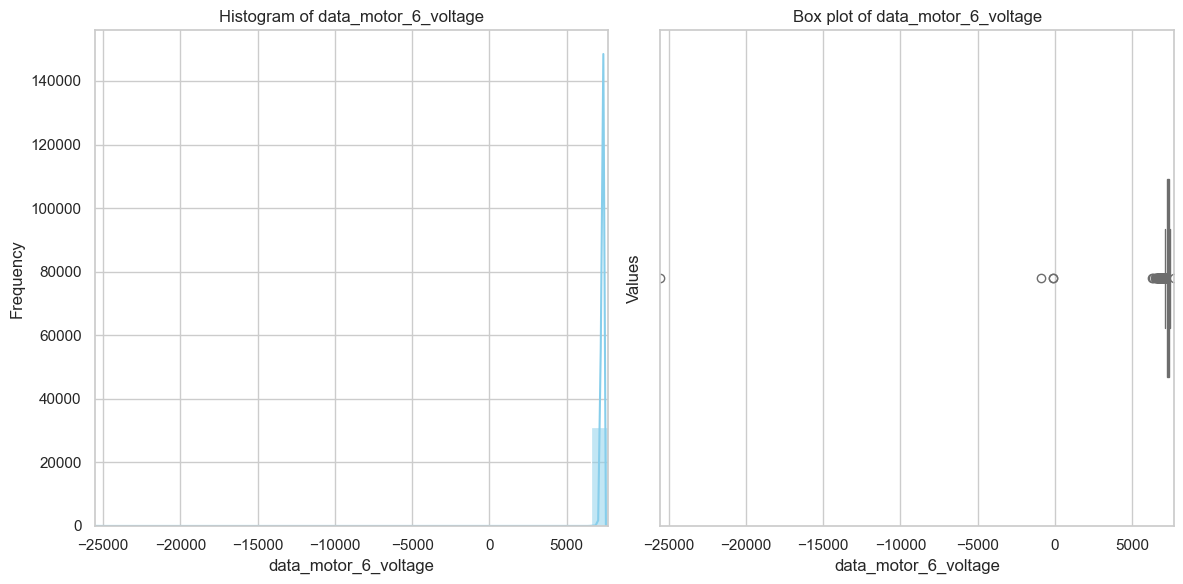

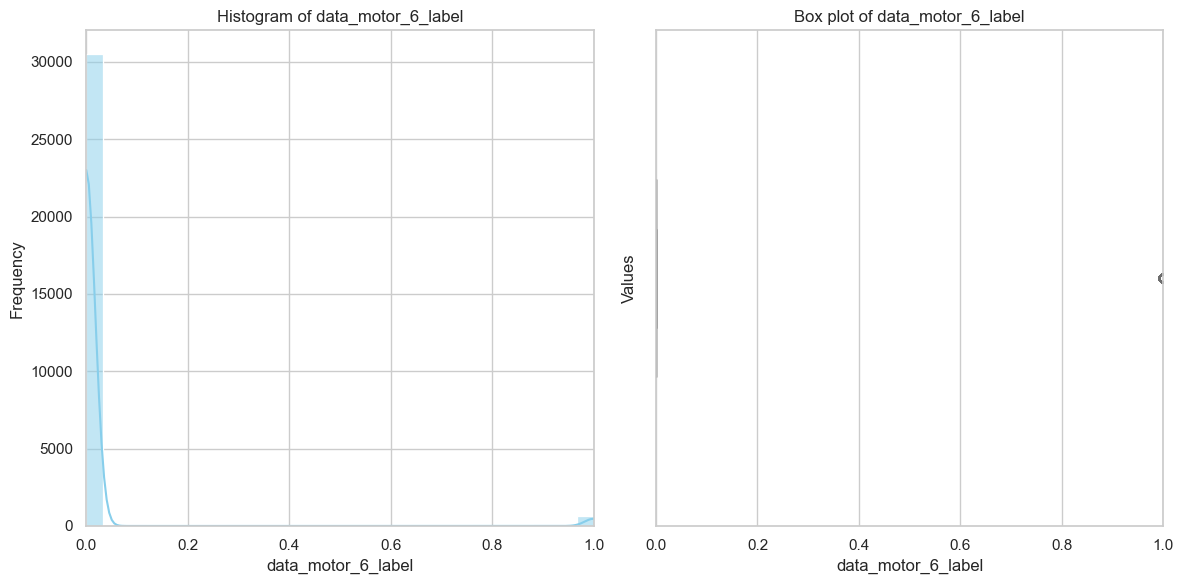

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_plot = df.columns[1:-1]

sns.set(style="whitegrid")

for column in columns_to_plot:
    min_val = df[column].min()
    max_val = df[column].max()
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram
    sns.histplot(df, x=column, ax=axes[0], kde=True, color='skyblue', bins=30) 
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)  
    axes[0].set_ylabel('Frequency')  
    axes[0].set_xlim(min_val, max_val)  
    
    # Plot box plot
    sns.boxplot(x=df[column], ax=axes[1], color='salmon', width=0.4) 
    axes[1].set_title(f'Box plot of {column}')
    axes[1].set_xlabel(column)  
    axes[1].set_ylabel('Values') 
    axes[1].set_xlim(min_val, max_val) 

    plt.tight_layout()
    plt.show()


## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

In [28]:
df[['time','data_motor_1_position']]

time  data_motor_1_position
0      76522.025433                     86
1      76522.125464                     86
2      76522.225432                     86
3      76522.325432                     86
4      76522.425451                     86
...             ...                    ...
31130  84966.426470                    195
31131  84966.526530                    195
31132  84966.626610                    195
31133  84966.726460                    195
31134  84966.826470                    195

[31135 rows x 2 columns]

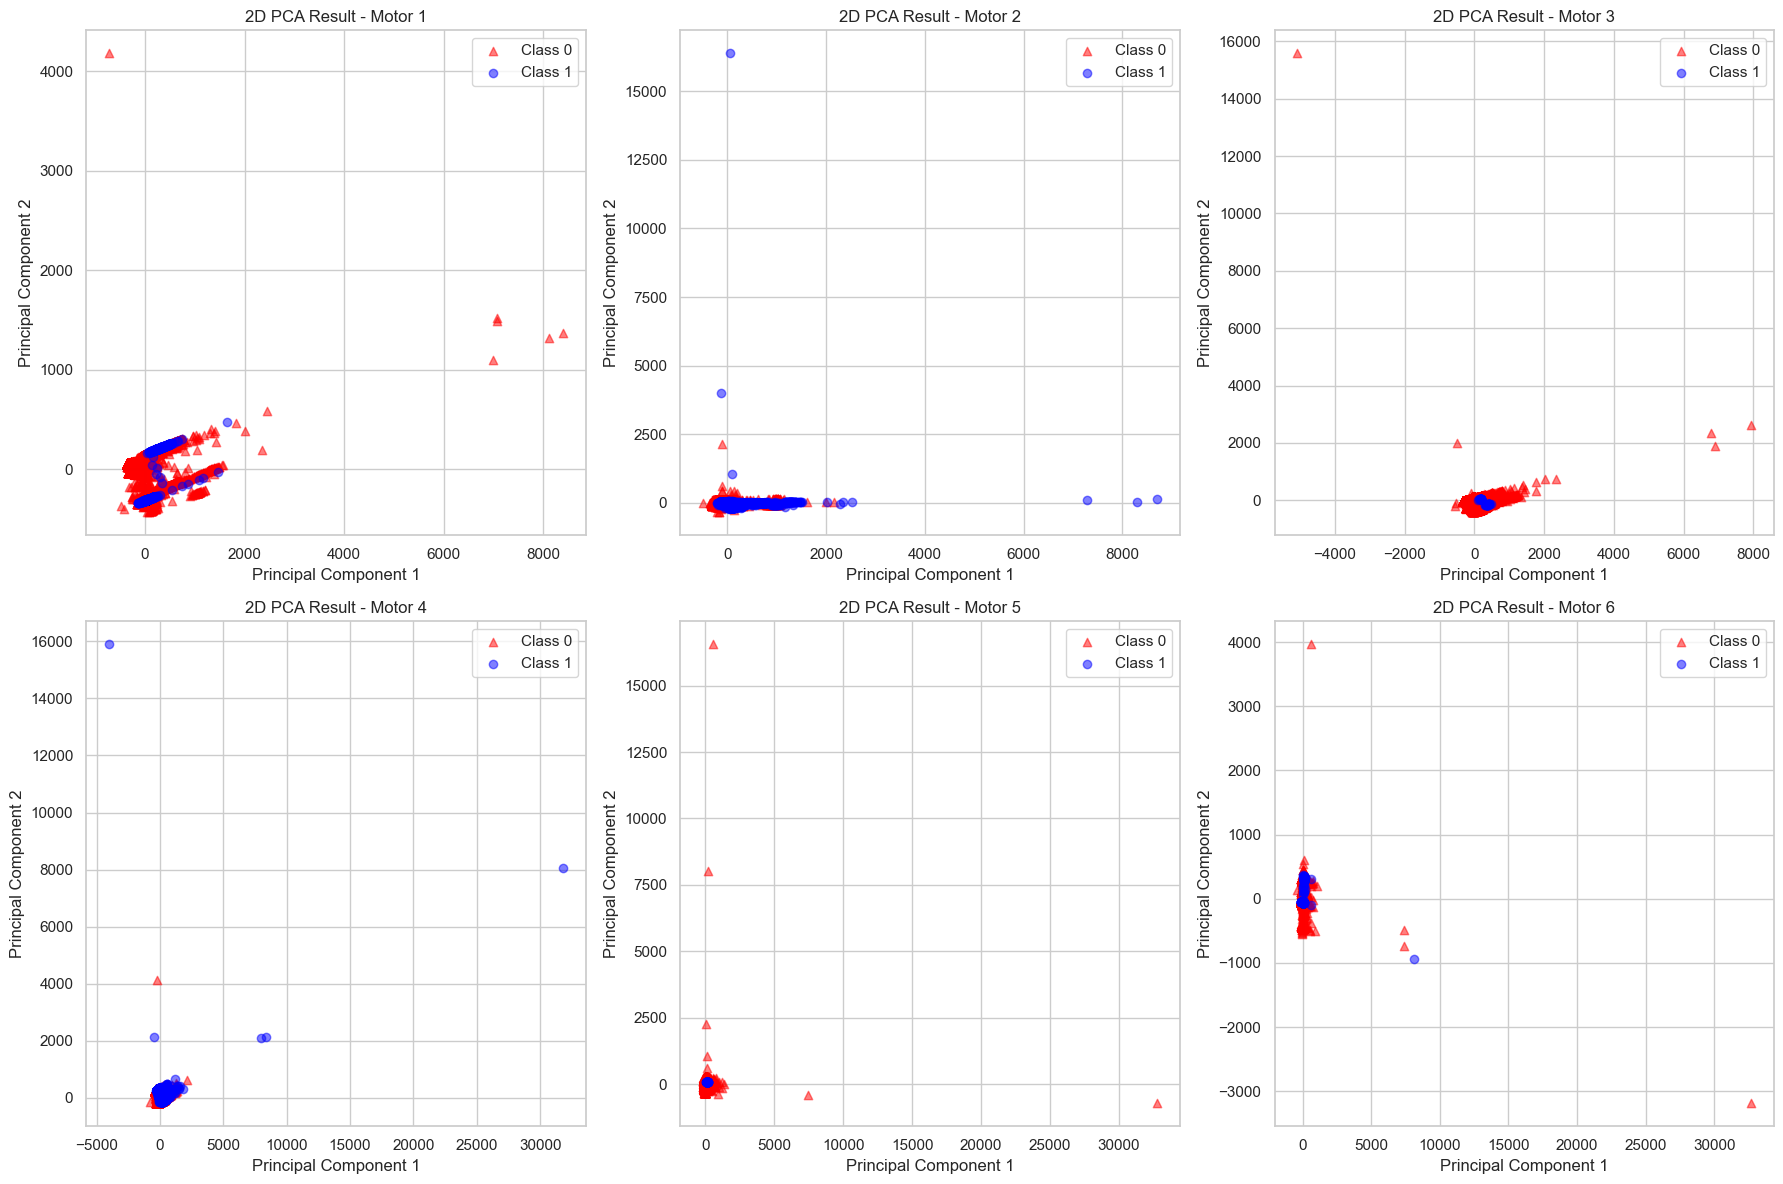

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df is your DataFrame containing data for all motors

motors = ['1', '2', '3', '4', '5', '6']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, motor in enumerate(motors):
    X = df[[f'data_motor_{motor}_position', f'data_motor_{motor}_temperature', f'data_motor_{motor}_voltage']]
    y = df[f'data_motor_{motor}_label']
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    ax = axes[i//3, i%3]
    ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    ax.set_title(f'2D PCA Result - Motor {motor}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()

plt.tight_layout()
plt.show()


In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```

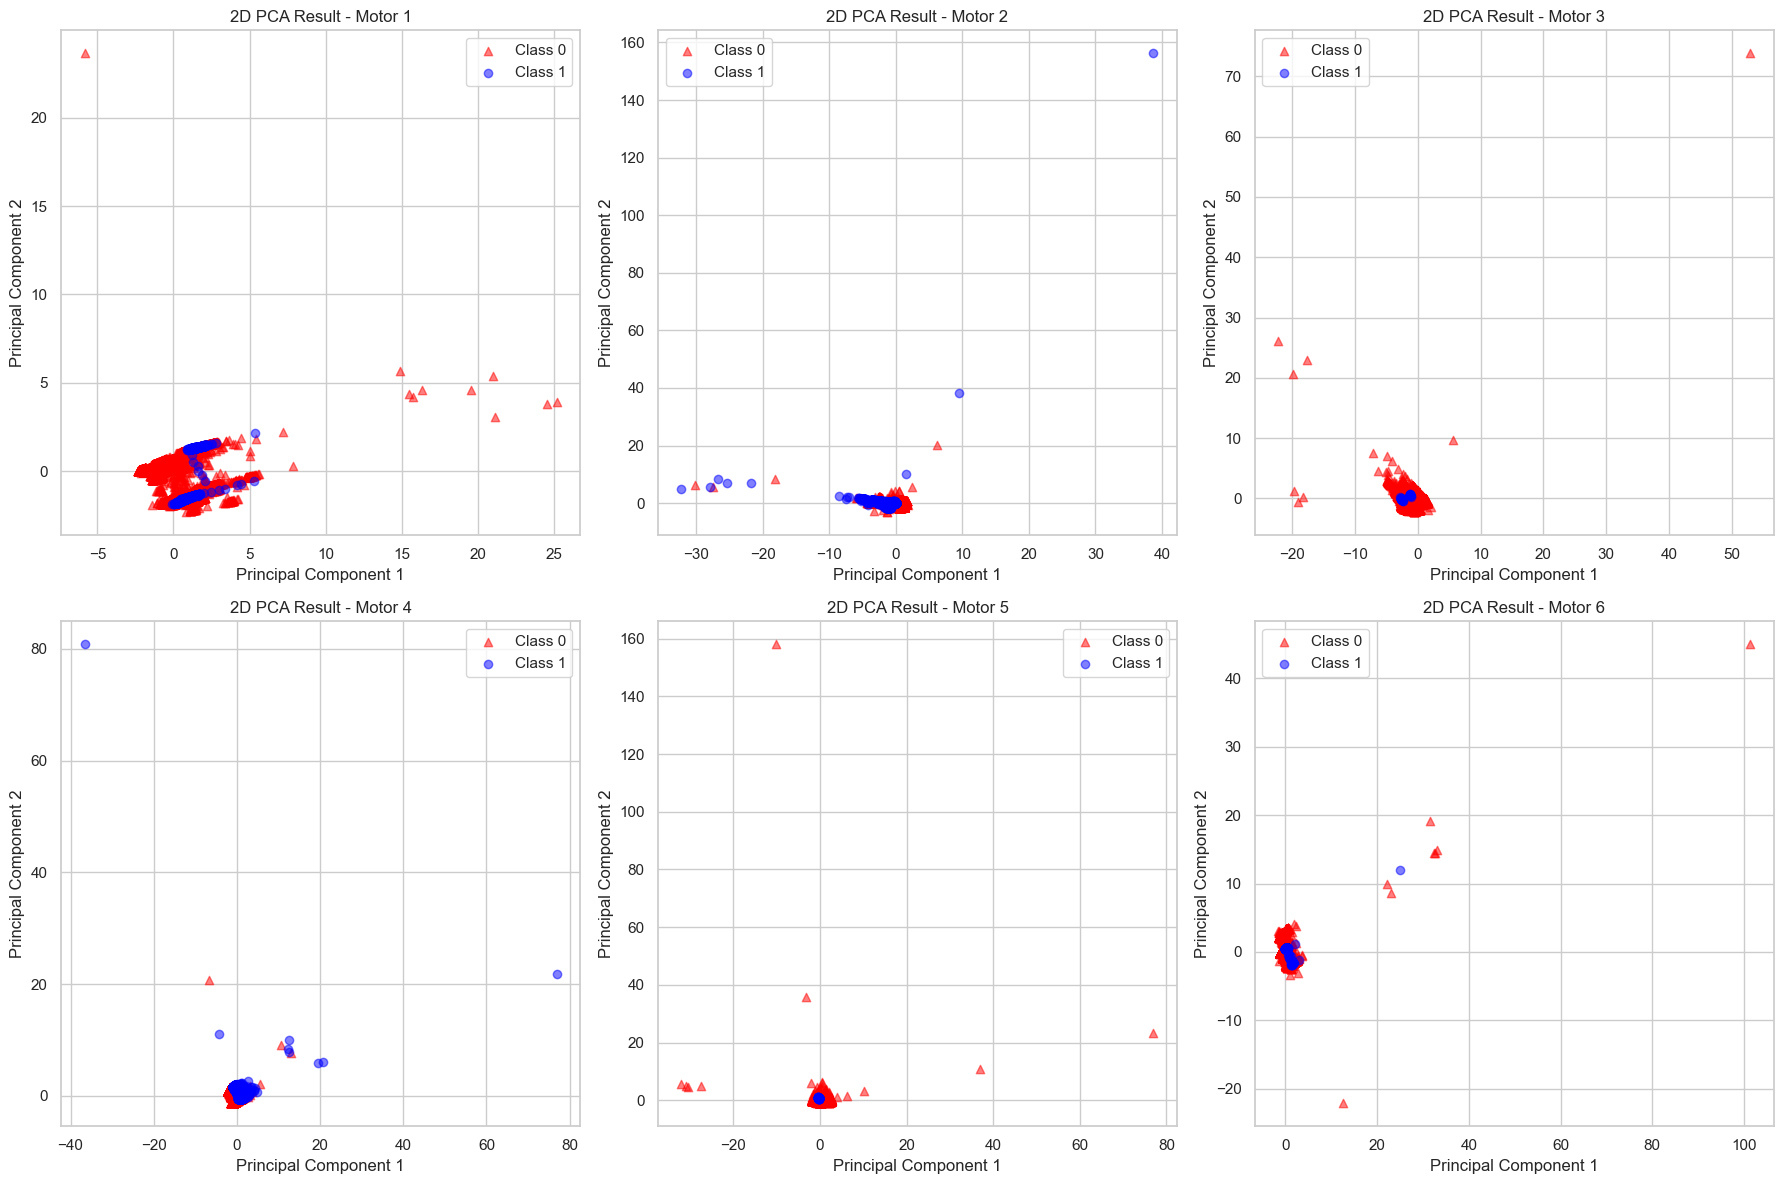

In [30]:
#Standardization : 
from sklearn.preprocessing import StandardScaler
motors = ['1', '2', '3', '4', '5', '6']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, motor in enumerate(motors):
    X = df[[f'data_motor_{motor}_position', f'data_motor_{motor}_temperature', f'data_motor_{motor}_voltage']]
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = df[f'data_motor_{motor}_label']
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    ax = axes[i//3, i%3]
    ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    ax.set_title(f'2D PCA Result - Motor {motor}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()

plt.tight_layout()
plt.show()


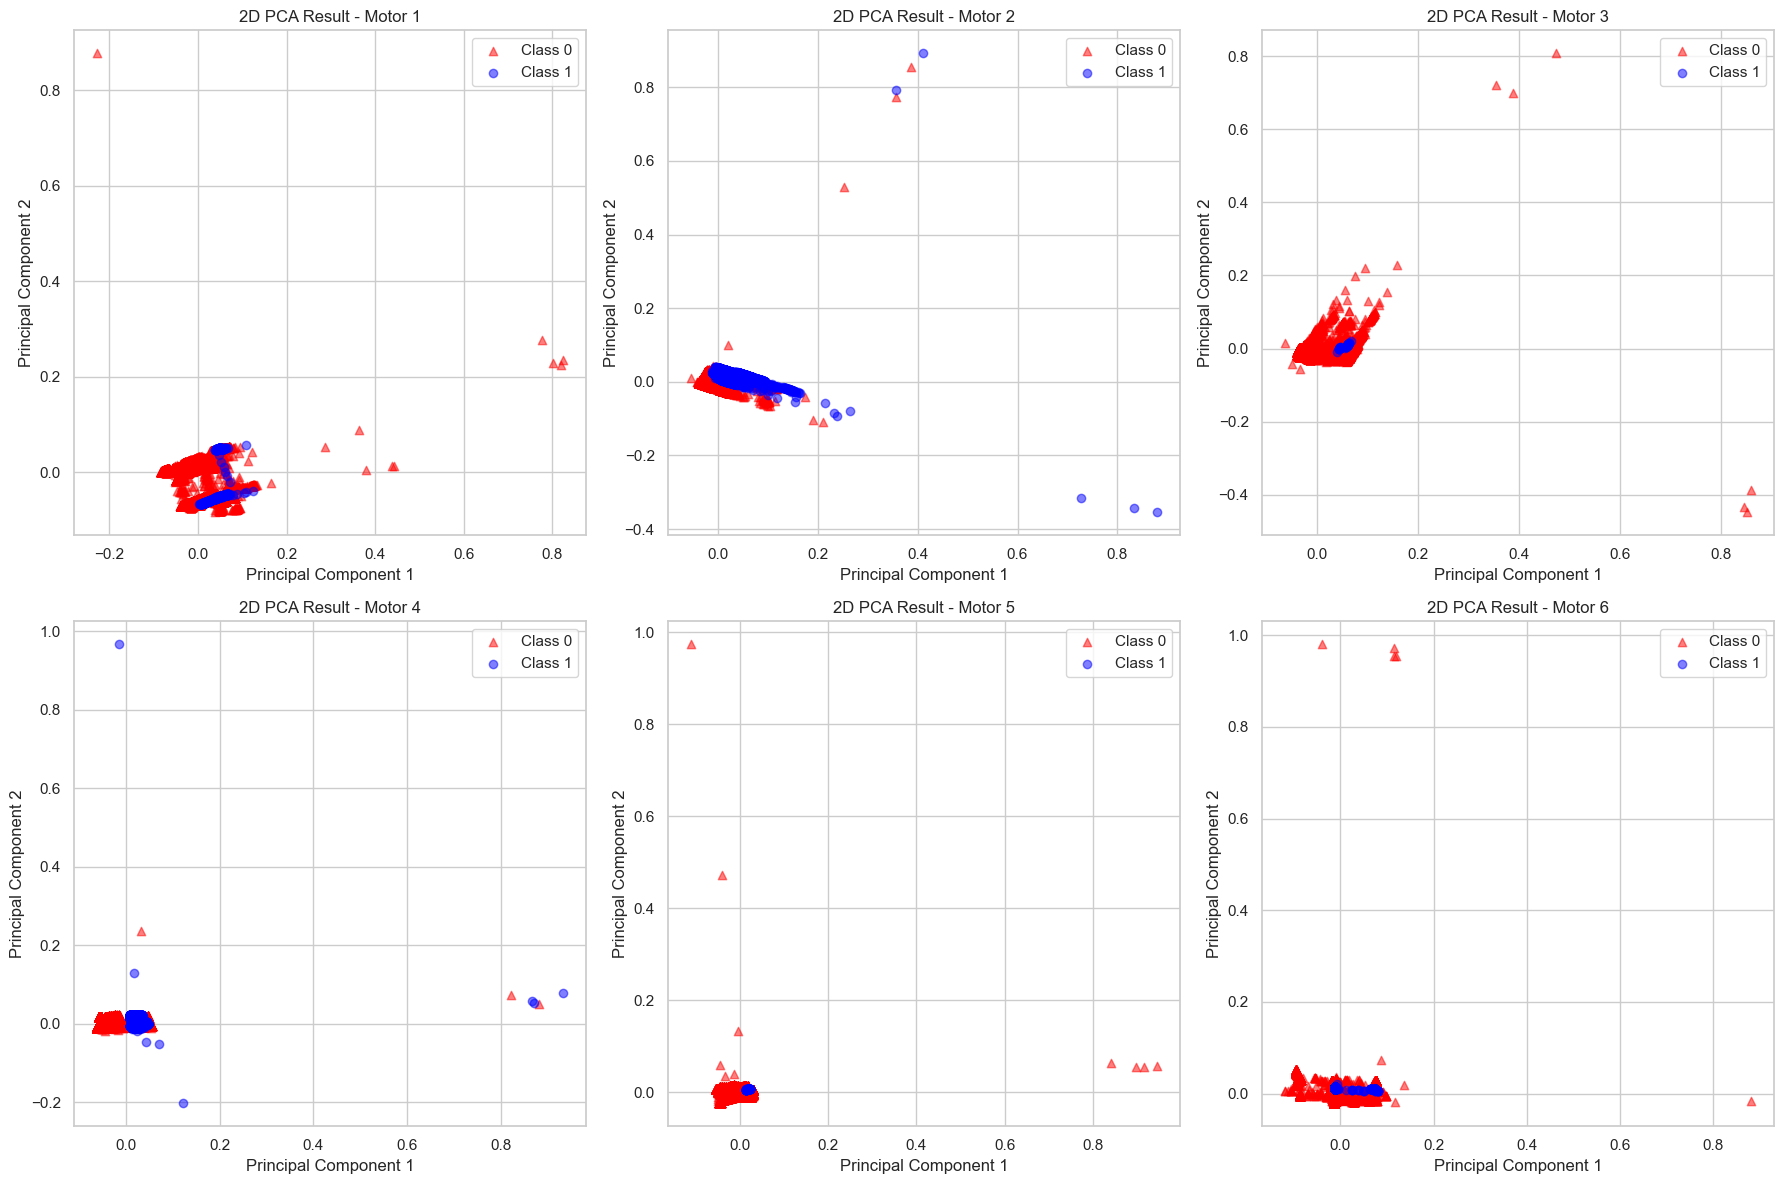

In [31]:
#Normalization : 
from sklearn.preprocessing import MinMaxScaler
motors = ['1', '2', '3', '4', '5', '6']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, motor in enumerate(motors):
    X = df[[f'data_motor_{motor}_position', f'data_motor_{motor}_temperature', f'data_motor_{motor}_voltage']]
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    y = df[f'data_motor_{motor}_label']
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    ax = axes[i//3, i%3]
    ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    ax.set_title(f'2D PCA Result - Motor {motor}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()

plt.tight_layout()
plt.show()


# Task 2 Data cleaning and preprocessing

## Task 1: Normalize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

In [32]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

## Task 2: Define a strategy to remove outliers.

Explain how you remove the outliers and implement your approach here.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31135 entries, 0 to 31134
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      31135 non-null  float64
 1   data_motor_1_position     31135 non-null  int64  
 2   data_motor_1_temperature  31135 non-null  int64  
 3   data_motor_1_voltage      31135 non-null  int64  
 4   data_motor_1_label        31135 non-null  int64  
 5   data_motor_2_position     31135 non-null  int64  
 6   data_motor_2_temperature  31135 non-null  int64  
 7   data_motor_2_voltage      31135 non-null  int64  
 8   data_motor_2_label        31135 non-null  int64  
 9   data_motor_3_position     31135 non-null  int64  
 10  data_motor_3_temperature  31135 non-null  int64  
 11  data_motor_3_voltage      31135 non-null  int64  
 12  data_motor_3_label        31135 non-null  int64  
 13  data_motor_4_position     31135 non-null  int64  
 14  data_m

In [34]:
col_to_clean = [col for col in df.columns if ('time' not in col and 'test' not in col and 'label' not in col)]
cleaned_df = df.copy()
for column in col_to_clean : 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19636 entries, 0 to 29379
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      19636 non-null  float64
 1   data_motor_1_position     19636 non-null  int64  
 2   data_motor_1_temperature  19636 non-null  int64  
 3   data_motor_1_voltage      19636 non-null  int64  
 4   data_motor_1_label        19636 non-null  int64  
 5   data_motor_2_position     19636 non-null  int64  
 6   data_motor_2_temperature  19636 non-null  int64  
 7   data_motor_2_voltage      19636 non-null  int64  
 8   data_motor_2_label        19636 non-null  int64  
 9   data_motor_3_position     19636 non-null  int64  
 10  data_motor_3_temperature  19636 non-null  int64  
 11  data_motor_3_voltage      19636 non-null  int64  
 12  data_motor_3_label        19636 non-null  int64  
 13  data_motor_4_position     19636 non-null  int64  
 14  data_motor_

## Task 3: Define a strategy to smooth the data.

Explain how do you smooth the data and implement your approach here.

In [35]:
window_size = 3  # Define the window size
df_smooth = cleaned_df.copy()
for col in col_to_clean:
# Compute the moving average
    smoothed_values = cleaned_df[col].rolling(window=window_size).mean()

    # Replace the original data with the smoothed data
    df_smooth[col] = smoothed_values


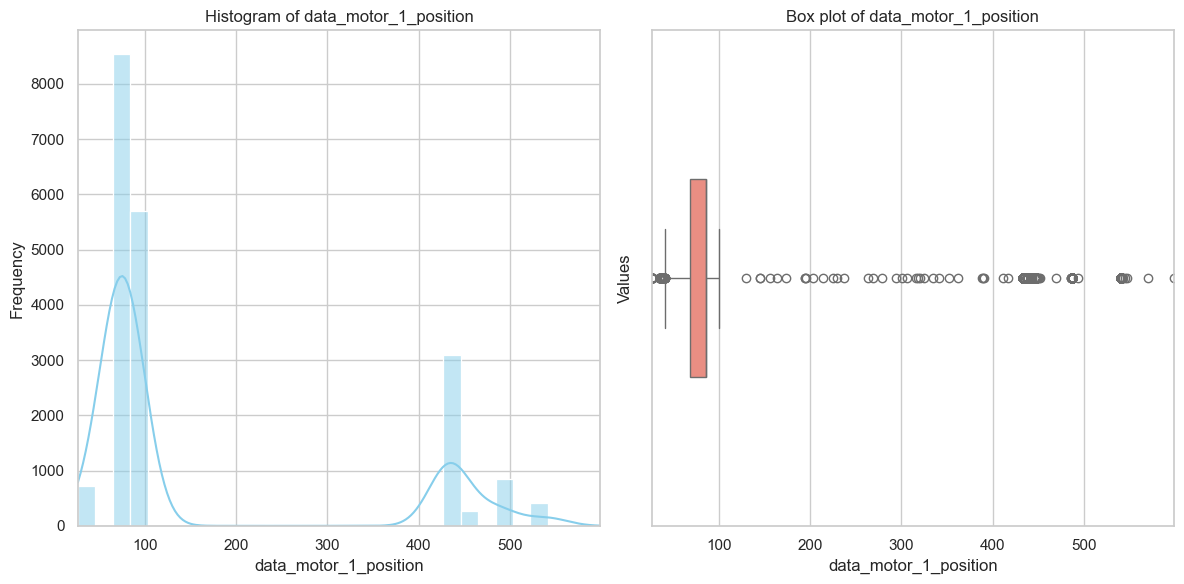

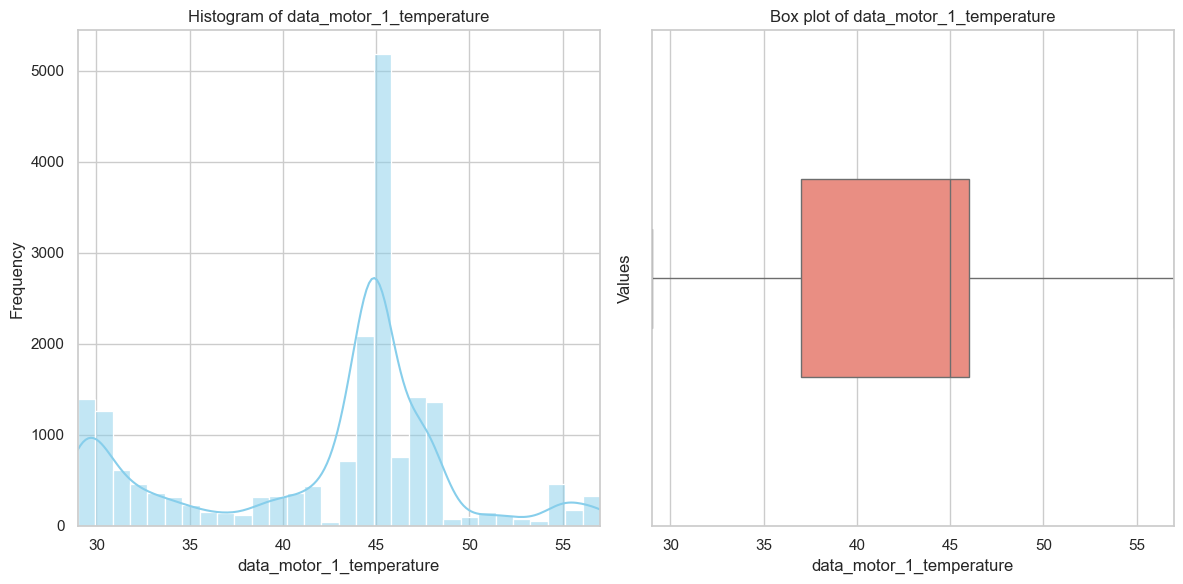

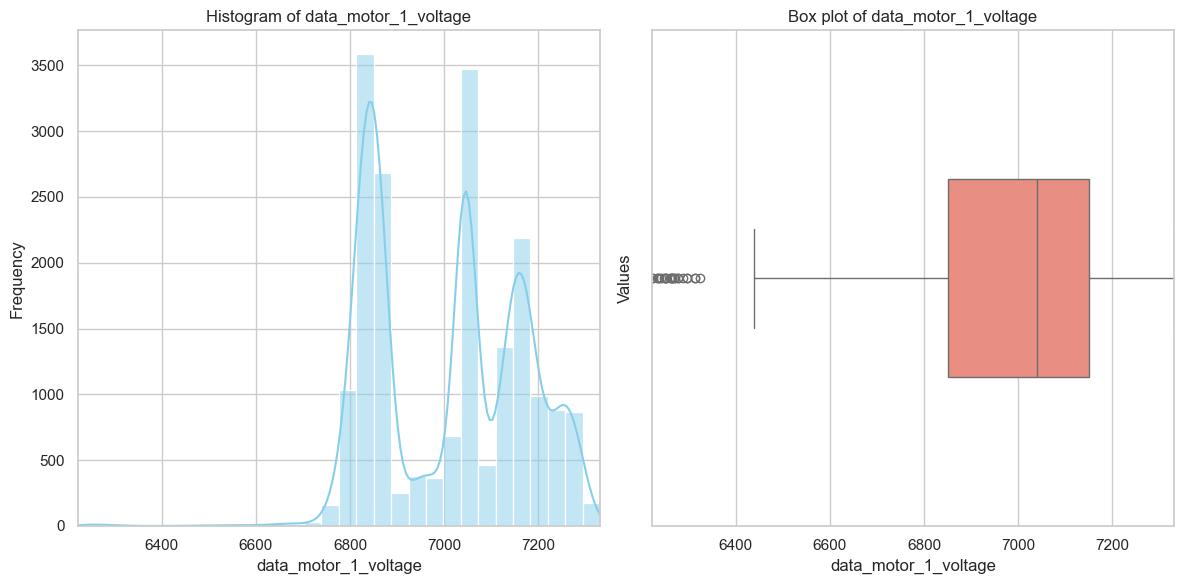

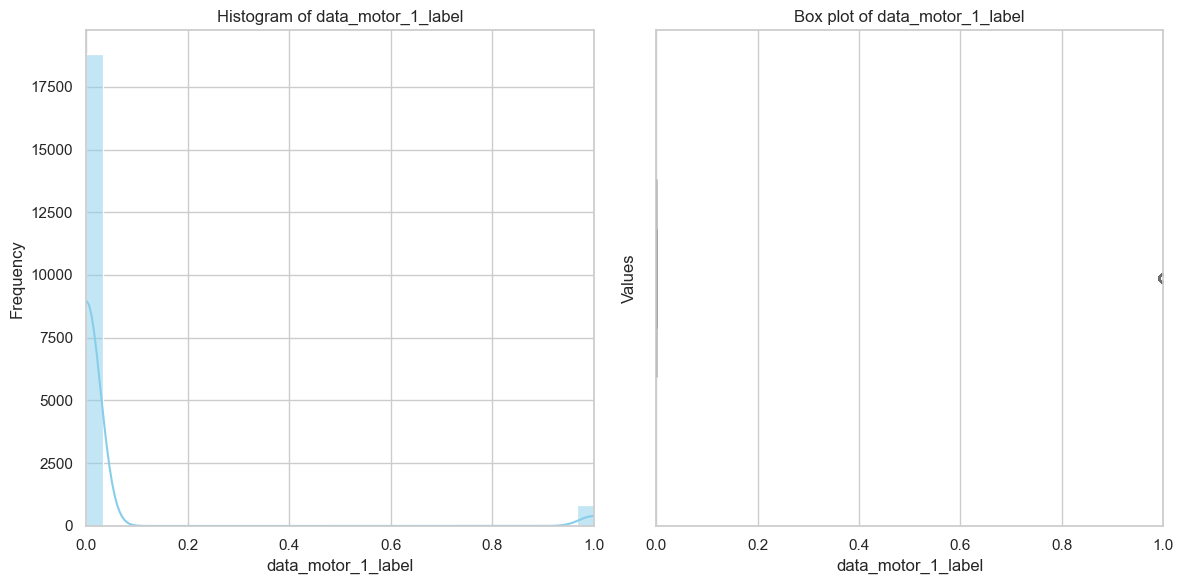

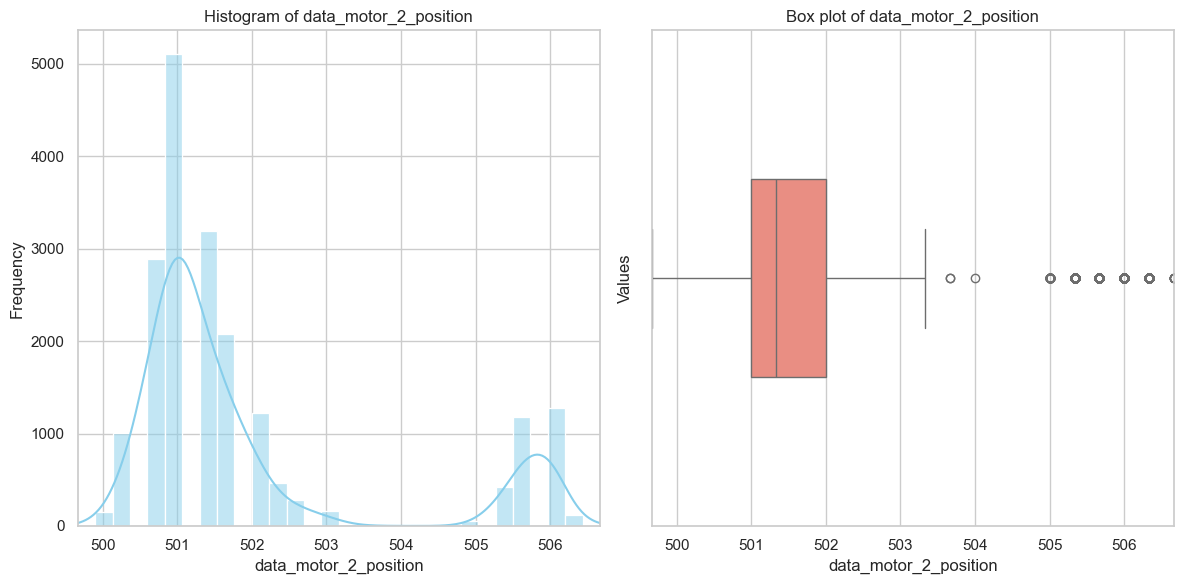

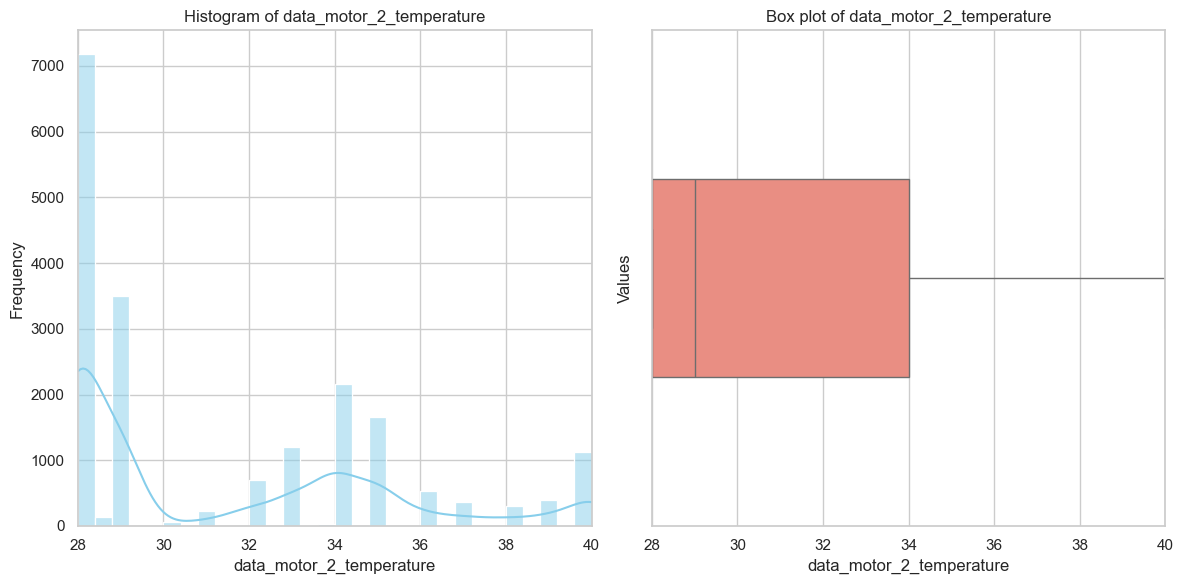

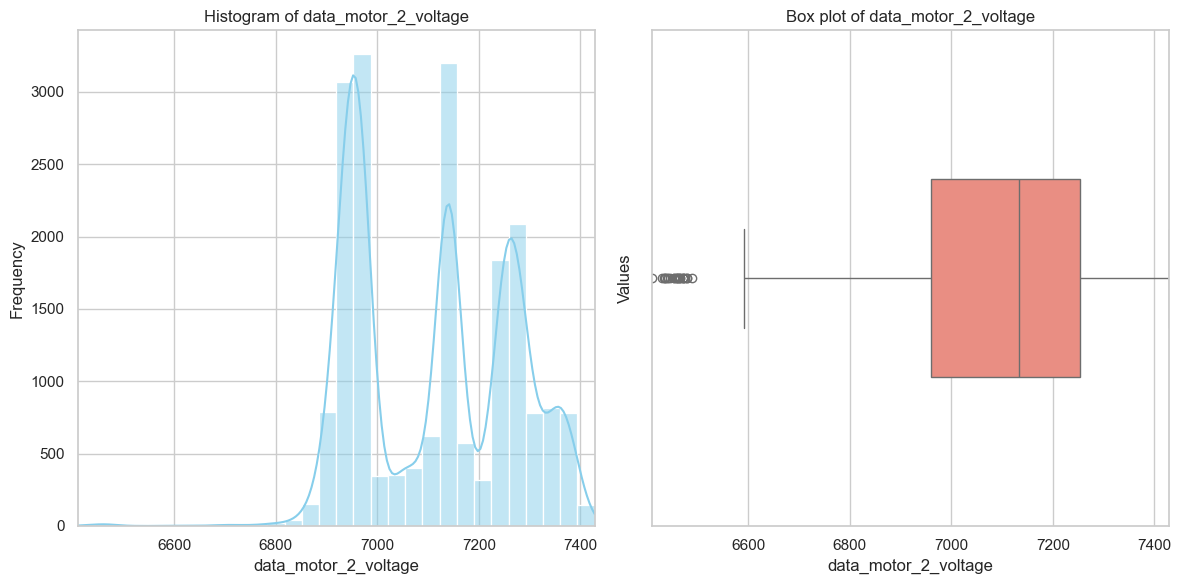

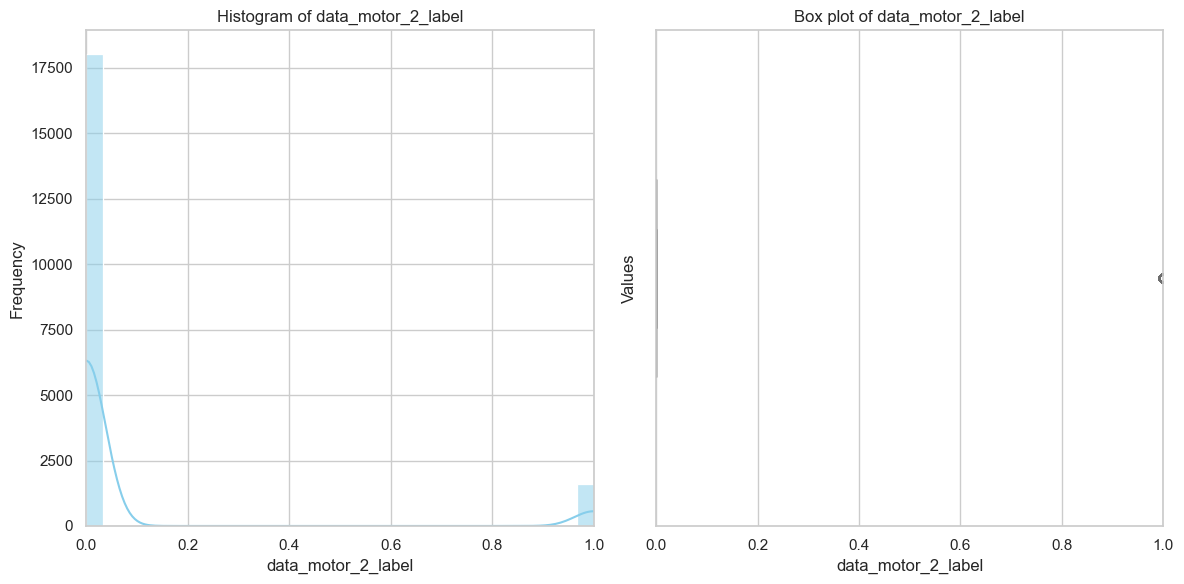

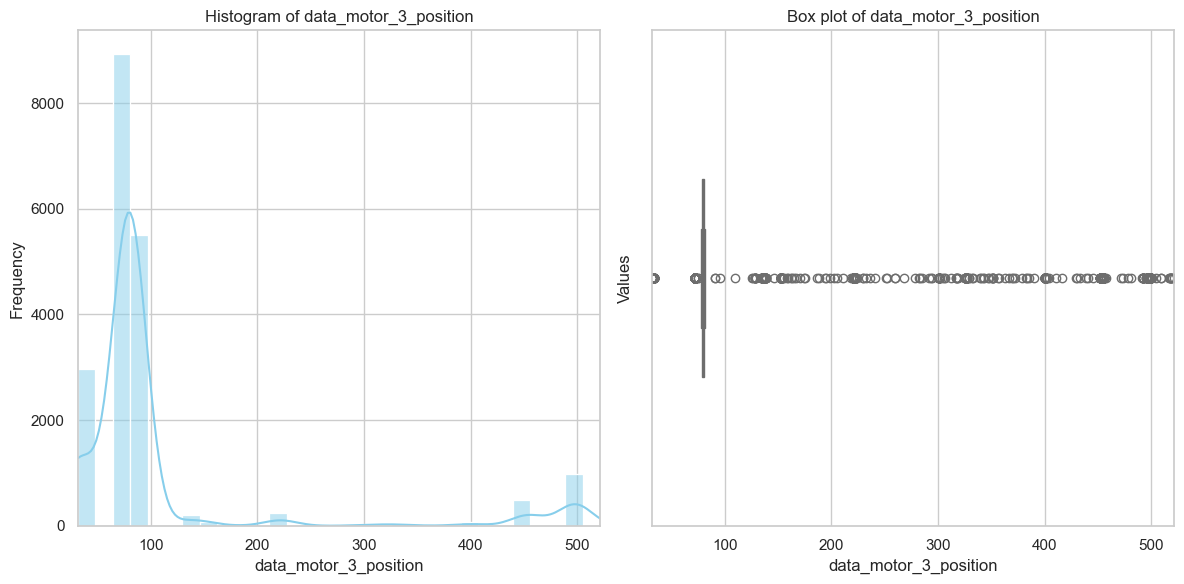

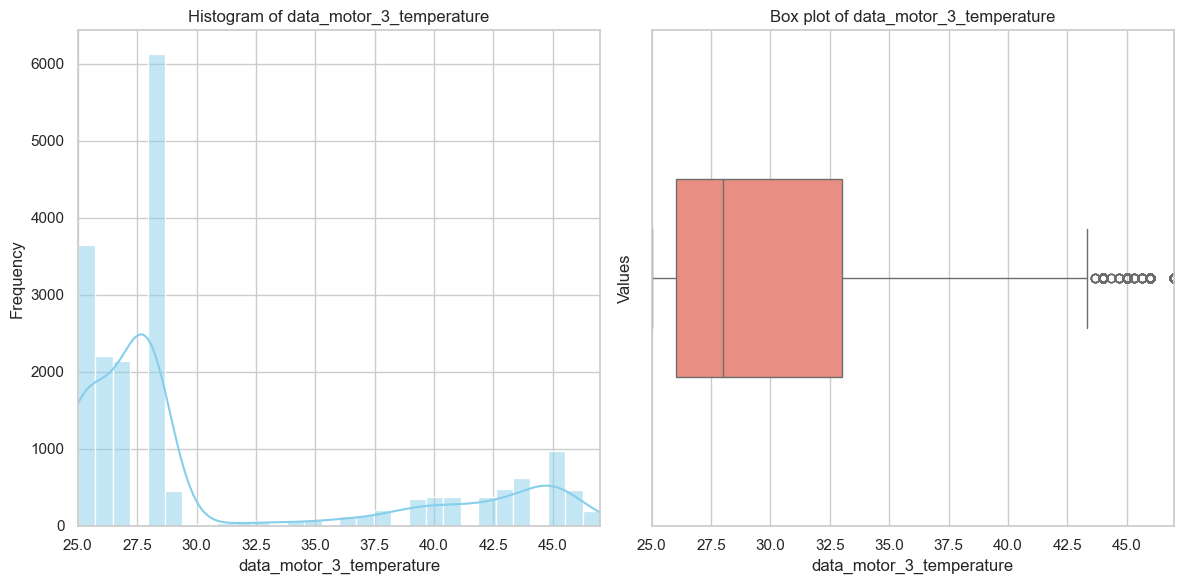

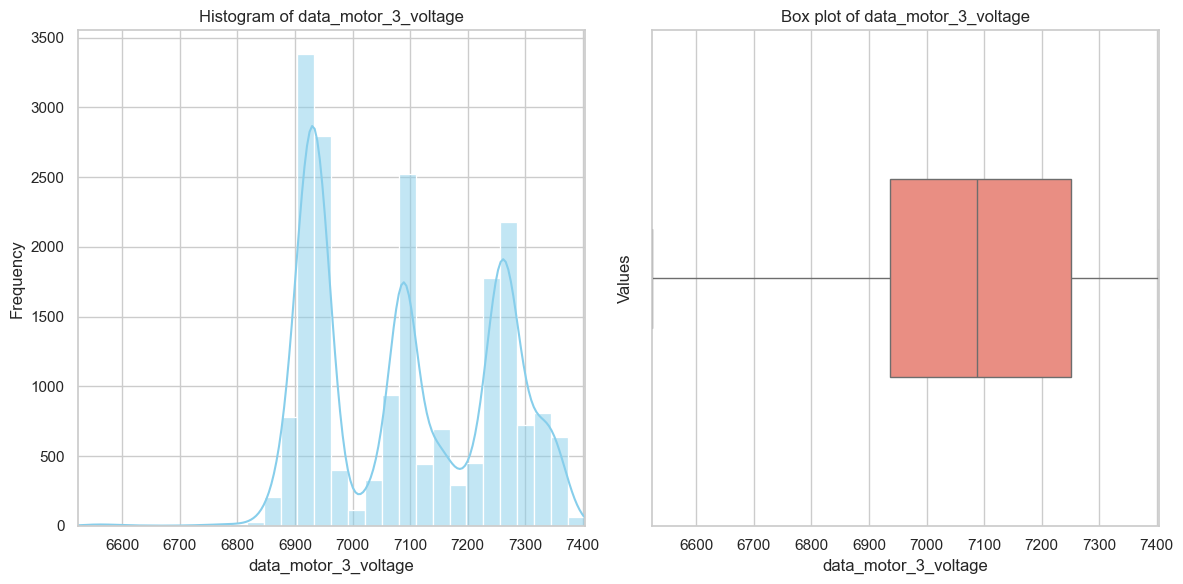

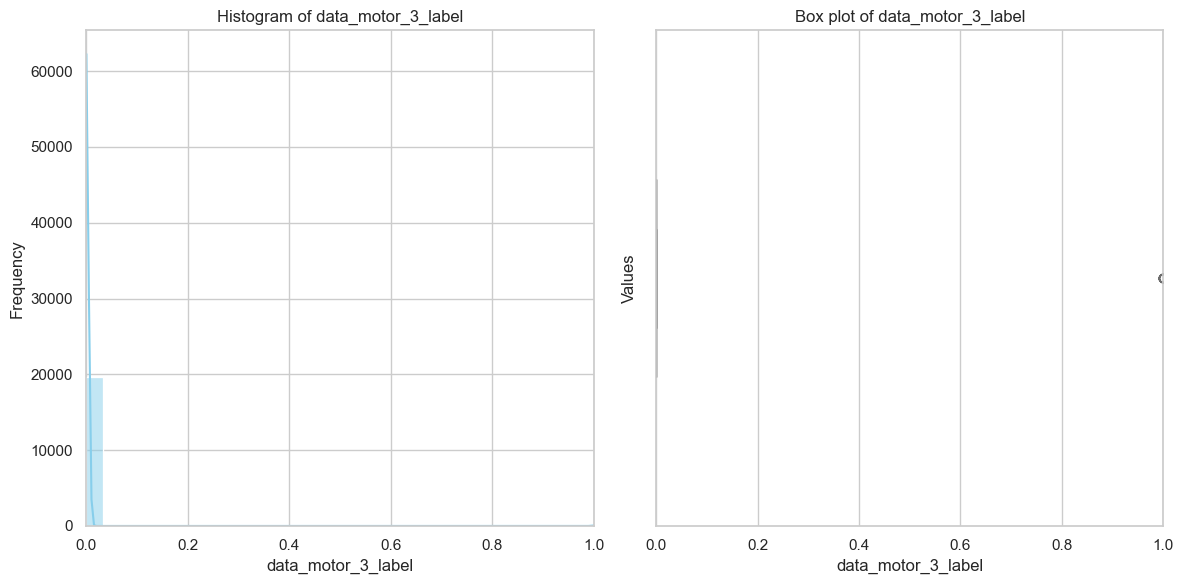

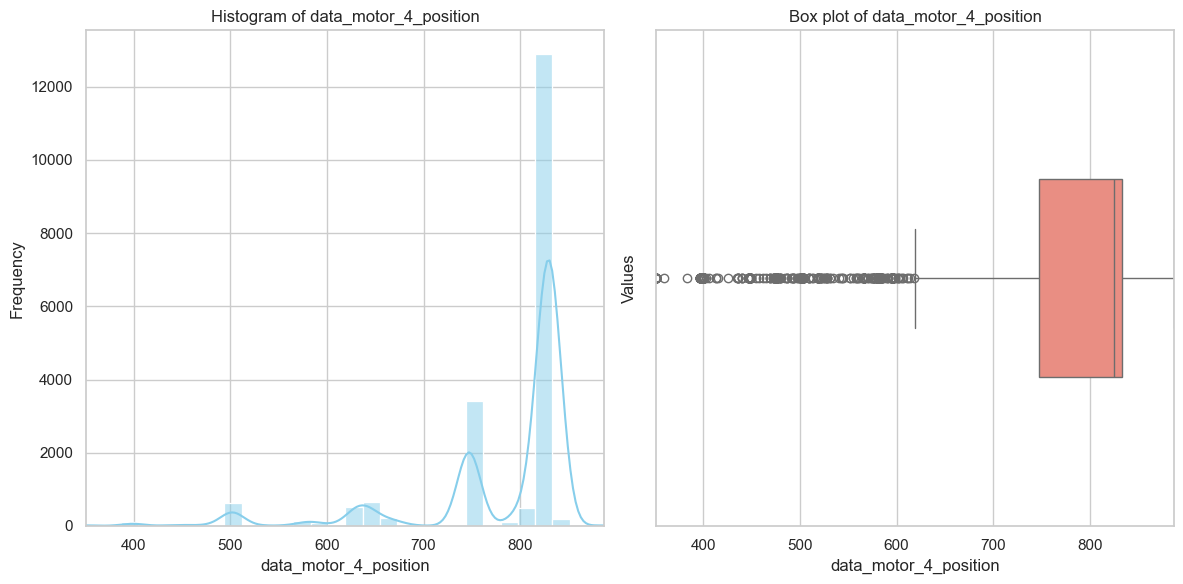

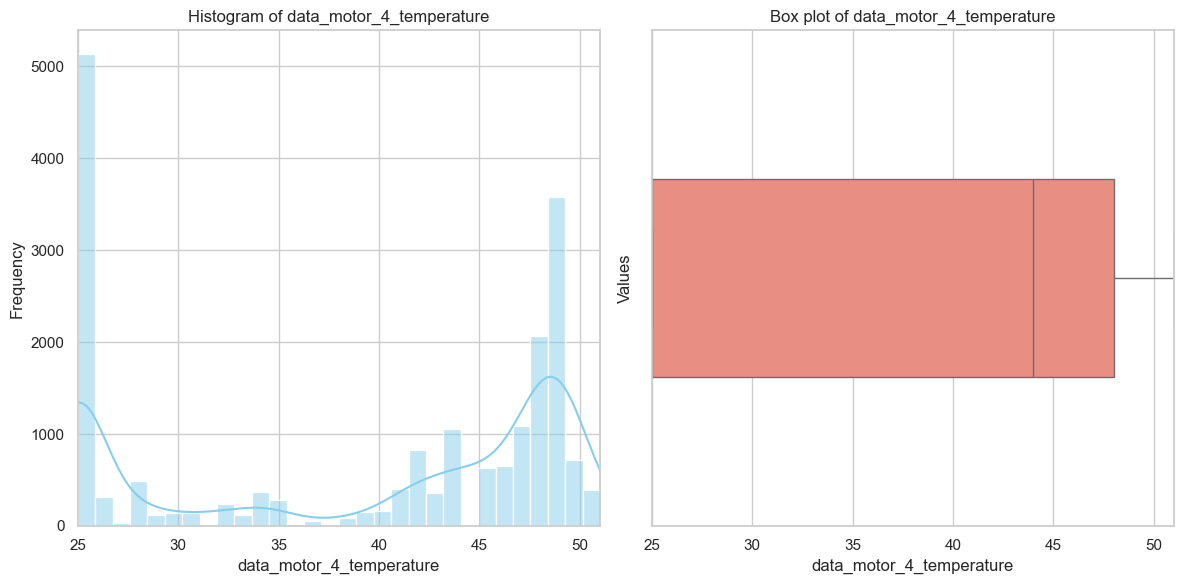

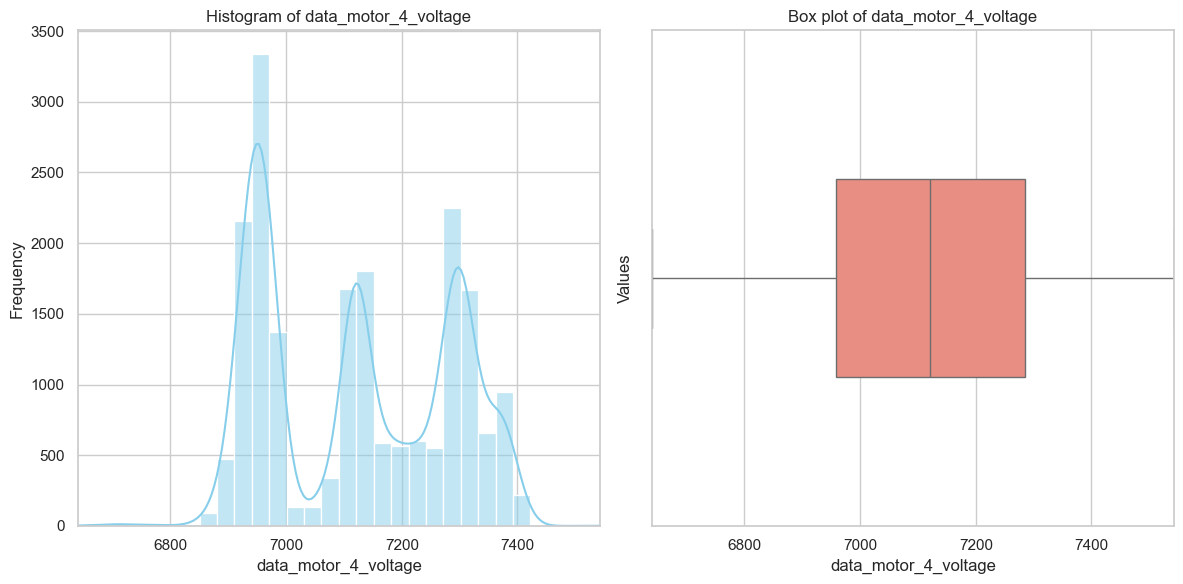

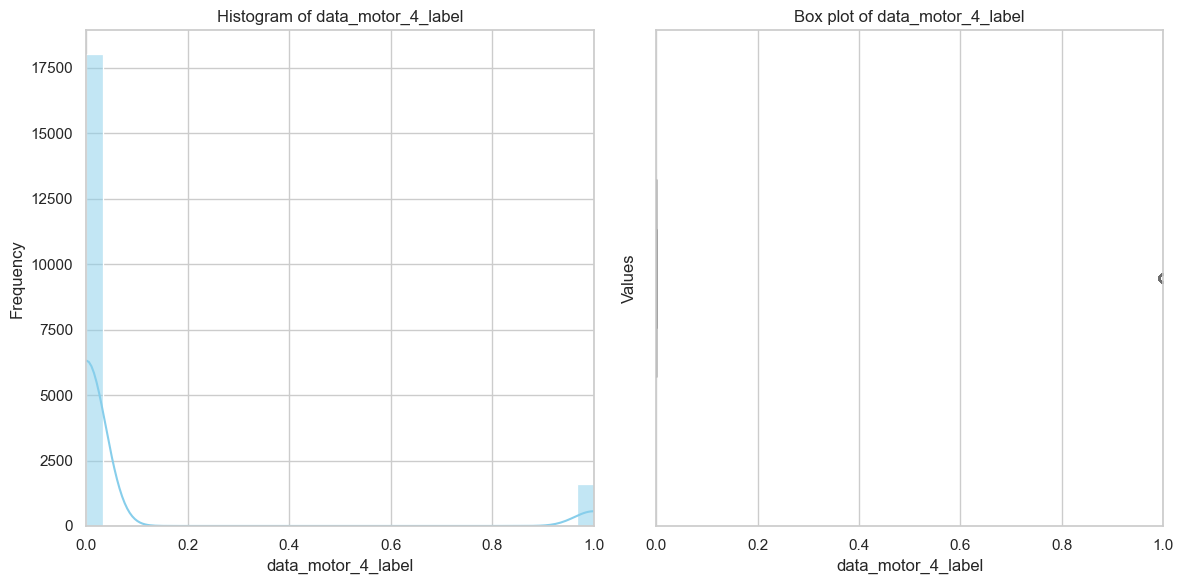

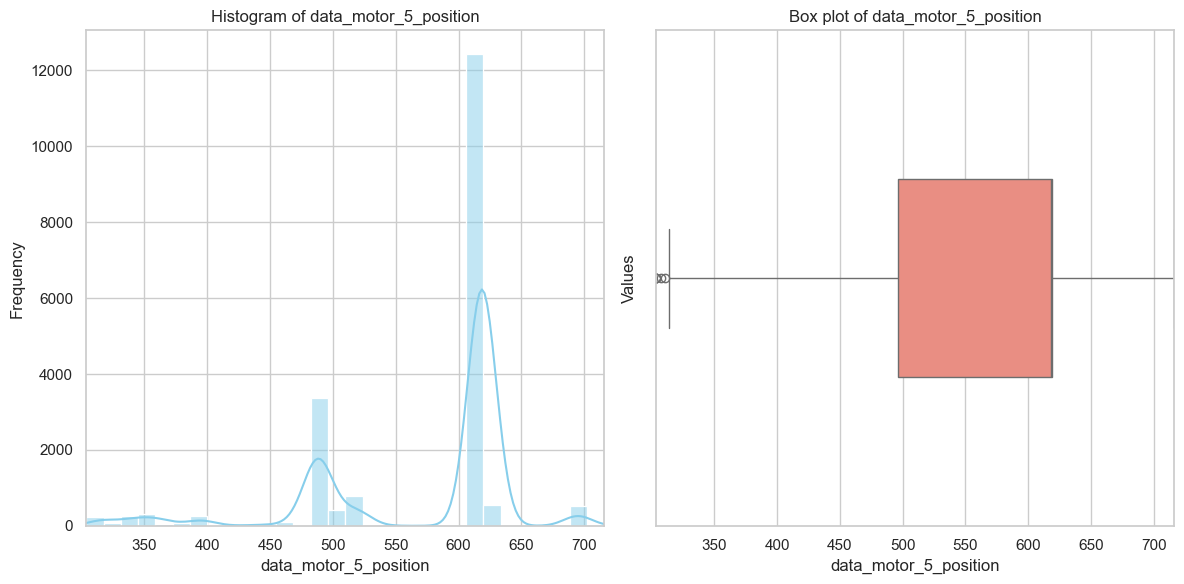

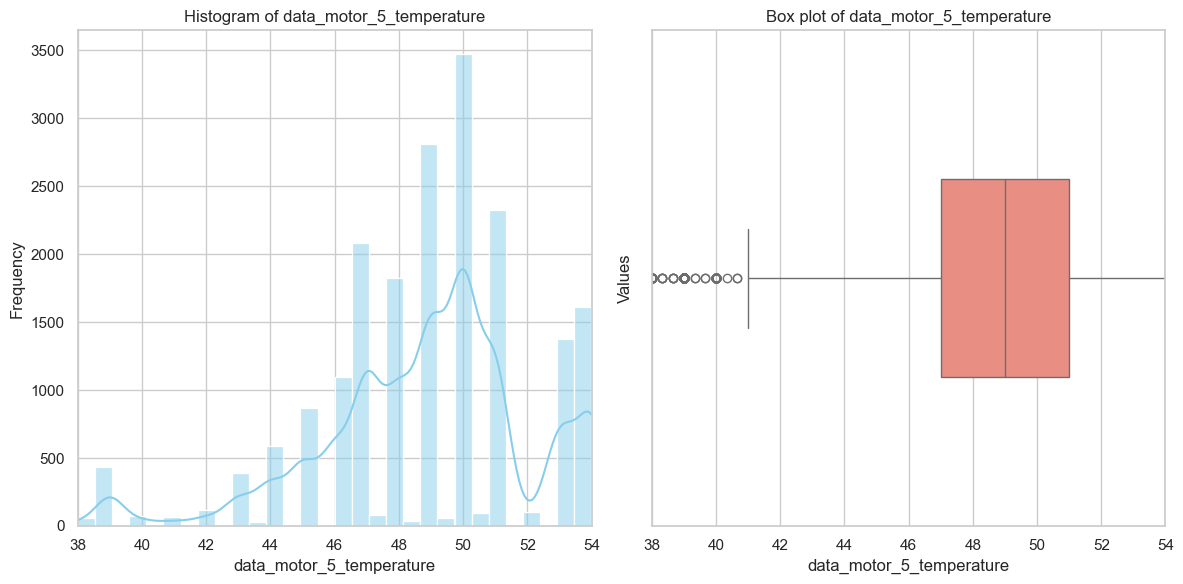

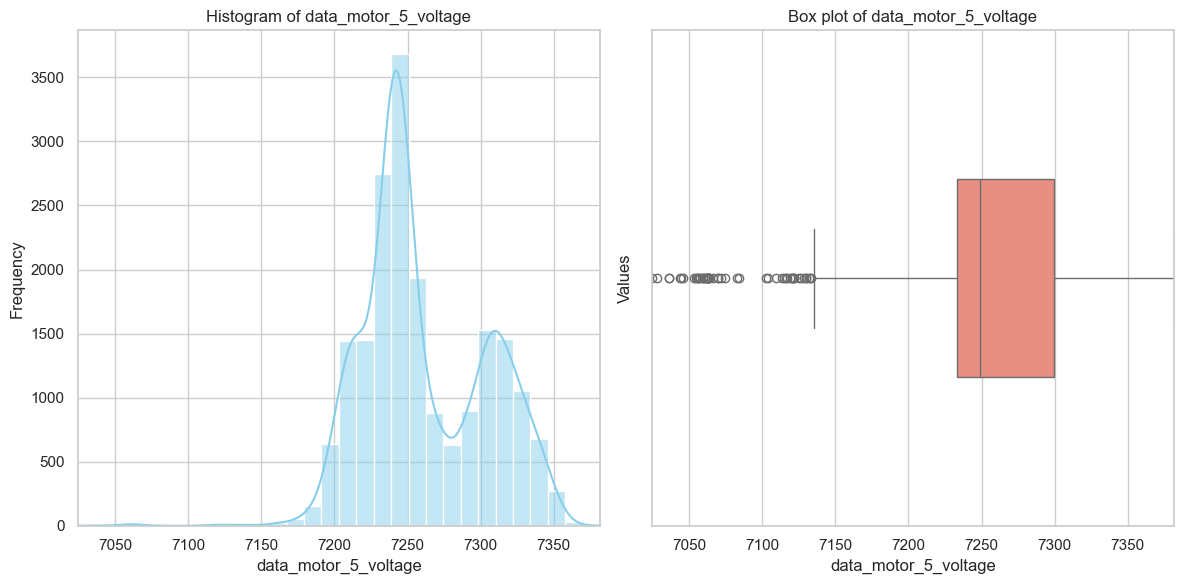

C:\Users\Come\AppData\Local\Temp\ipykernel_11912\2339067954.py:21: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[0].set_xlim(min_val, max_val)
C:\Users\Come\AppData\Local\Temp\ipykernel_11912\2339067954.py:28: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].set_xlim(min_val, max_val)


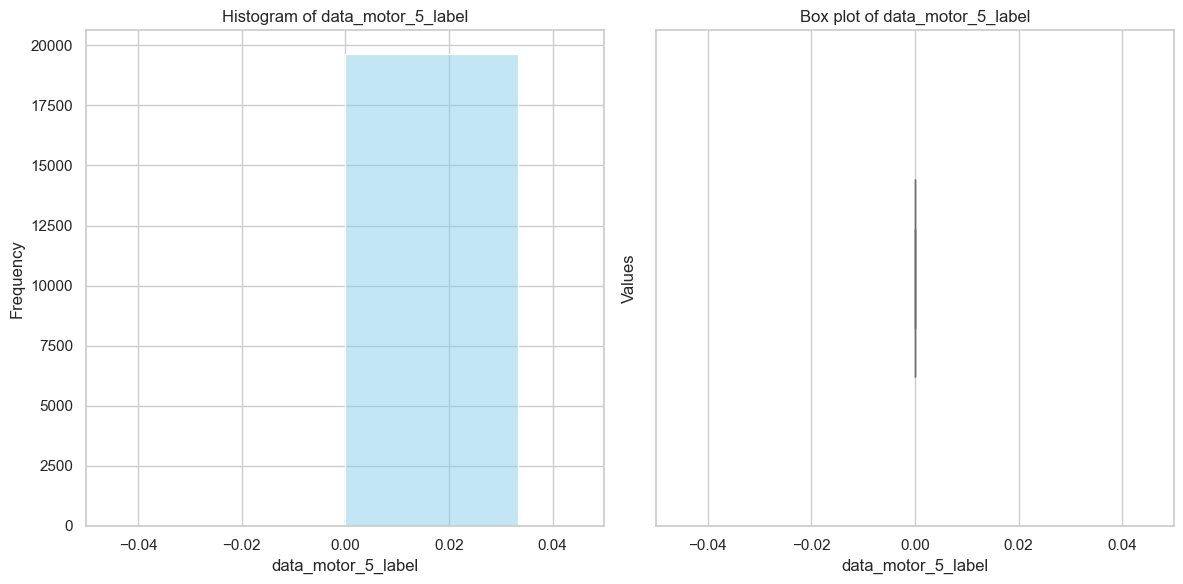

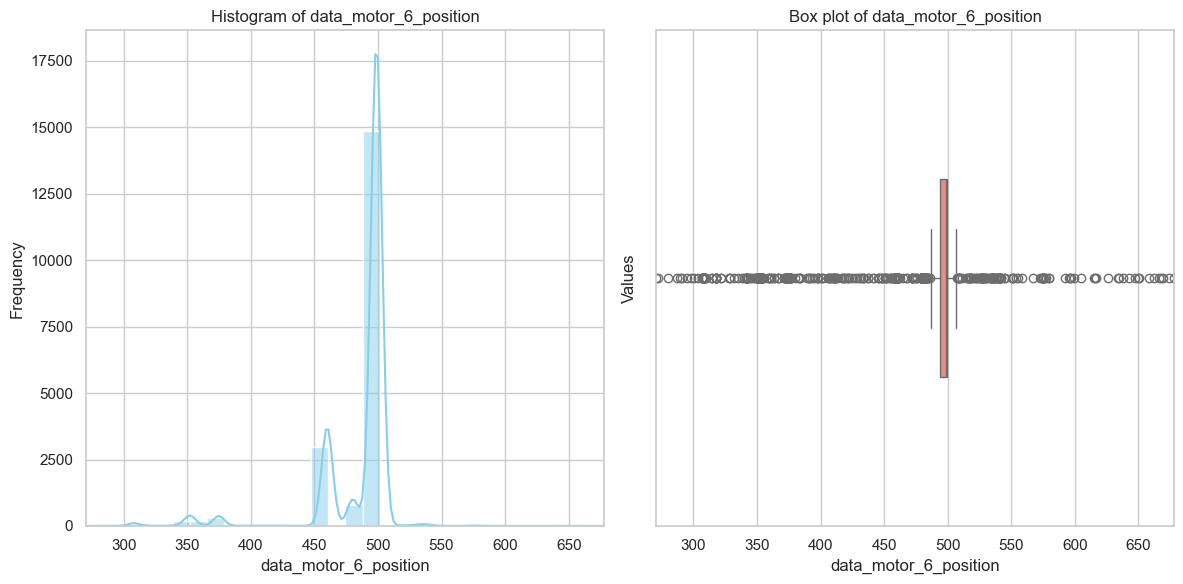

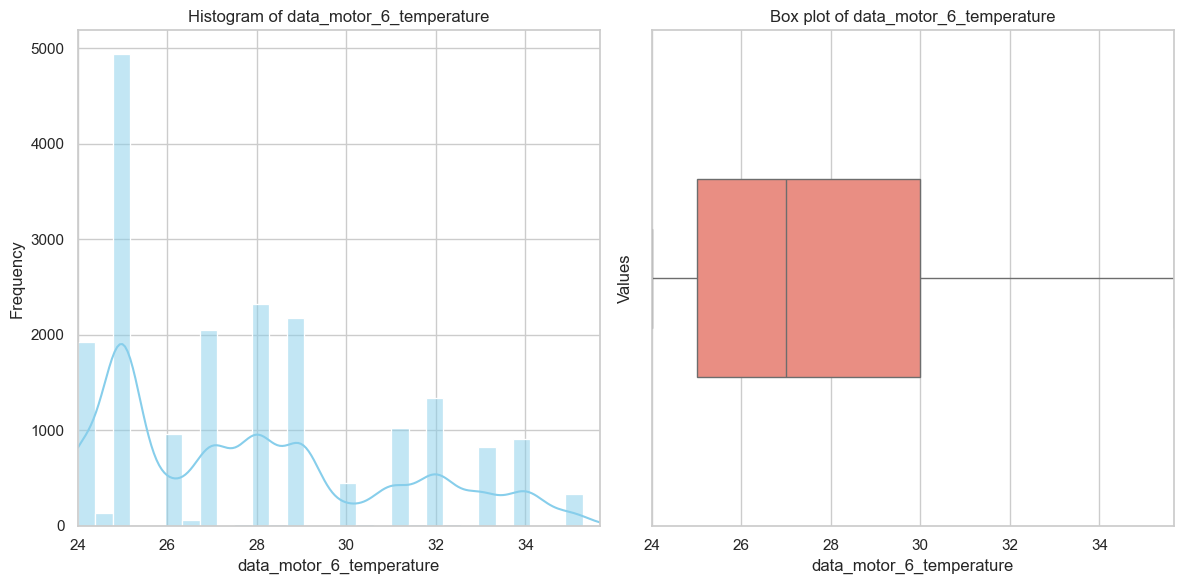

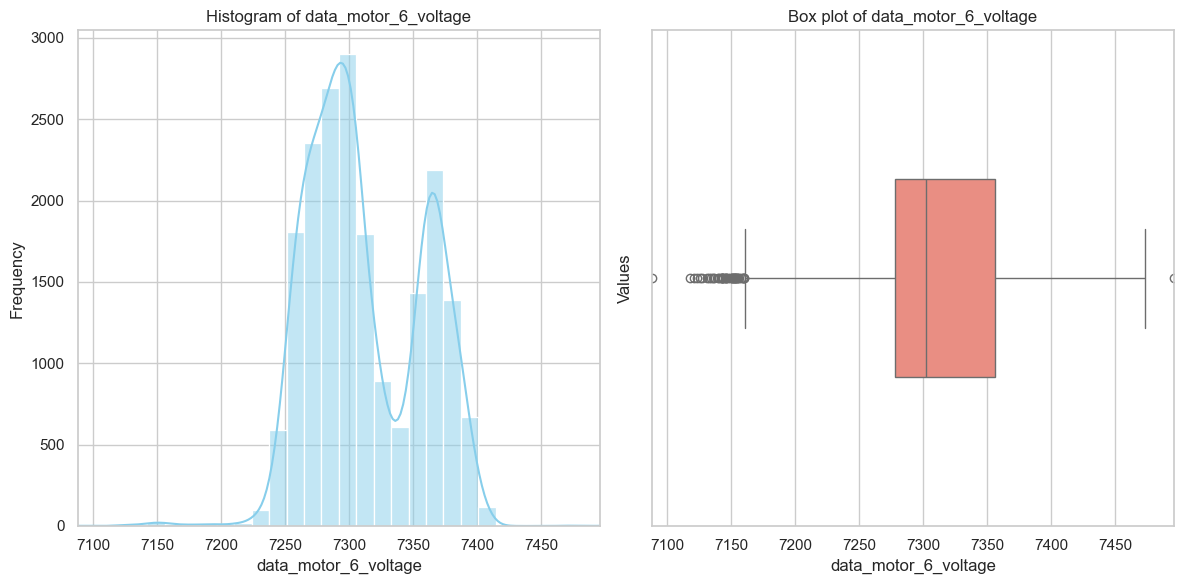

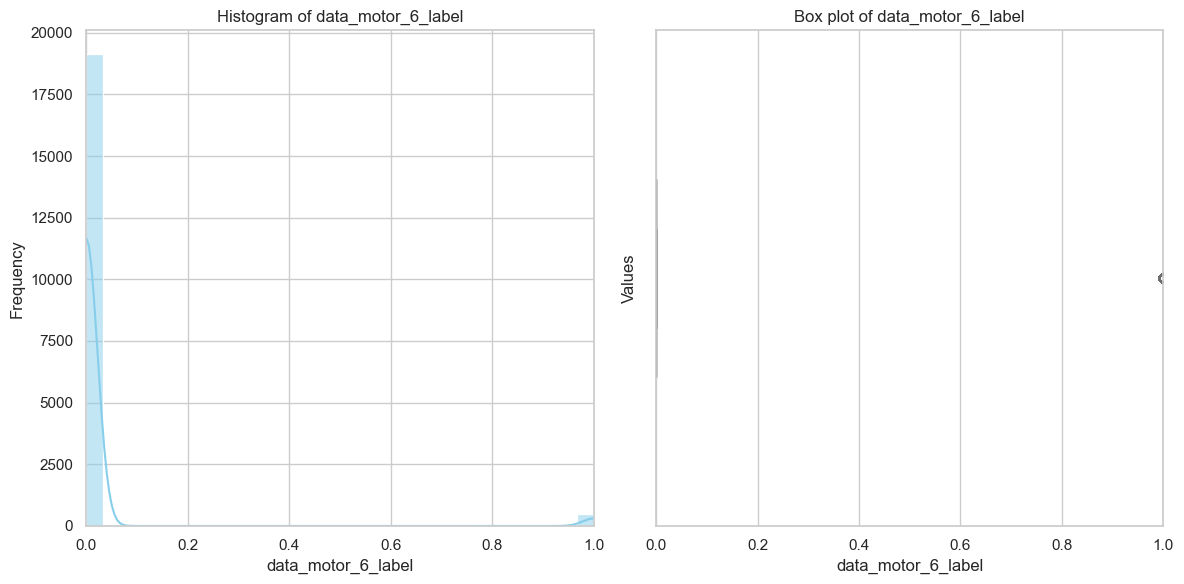

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_smooth.copy()
columns_to_plot = df.columns[1:-1]

sns.set(style="whitegrid")

for column in columns_to_plot:
    min_val = df[column].min()
    max_val = df[column].max()
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram
    sns.histplot(df, x=column, ax=axes[0], kde=True, color='skyblue', bins=30) 
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)  
    axes[0].set_ylabel('Frequency')  
    axes[0].set_xlim(min_val, max_val)  
    
    # Plot box plot
    sns.boxplot(x=df[column], ax=axes[1], color='salmon', width=0.4) 
    axes[1].set_title(f'Box plot of {column}')
    axes[1].set_xlabel(column)  
    axes[1].set_ylabel('Values') 
    axes[1].set_xlim(min_val, max_val) 

    plt.tight_layout()
    plt.show()


# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

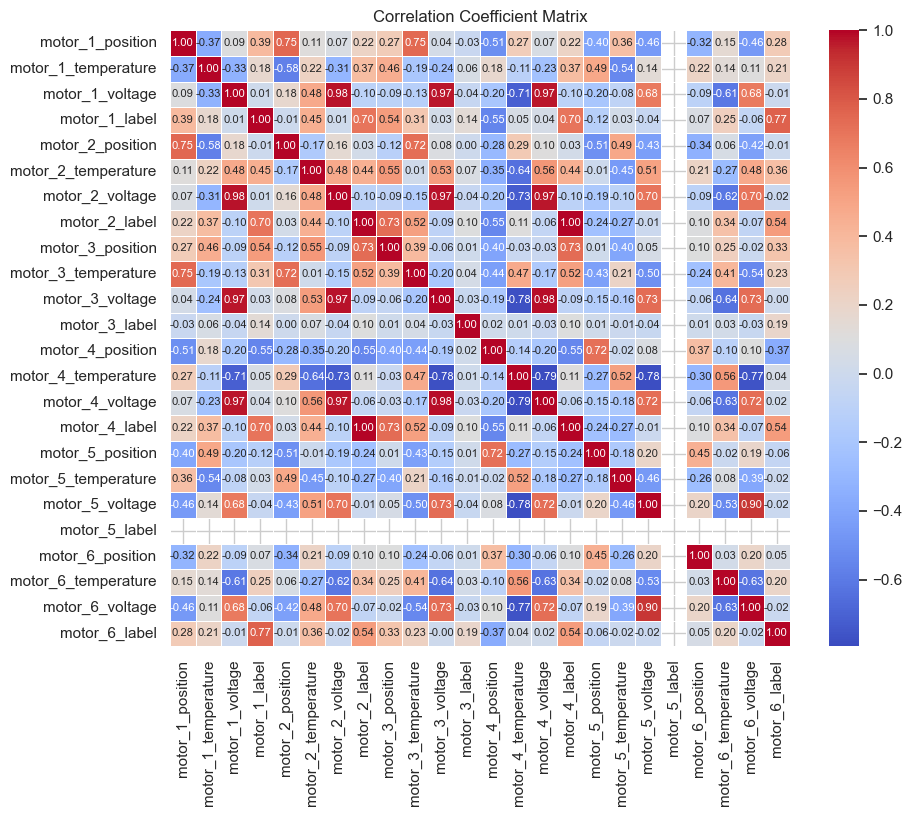

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Remove the first and last columns from the dataframe
df = df.iloc[:, 1:-1]

# Compute the correlation matrix
correlation_matrix = df.corr()

# Remove the first and last columns from column names
correlation_matrix.columns = [col[5:] for col in correlation_matrix.columns]
correlation_matrix.index = [index[5:] for index in correlation_matrix.index]

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix with smaller font size for numbers
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

# Add title and display the plot
plt.title('Correlation Coefficient Matrix')
plt.show()


## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?


